### Ejercicio machine learning (clasificación y regresión vinícola)

El dataset proviene de la Universdad de Minho, generado por P. Cortez et al. Dicho dataset se encuentra en el UC Irvine Machine Learning Repository (aquí está disponible; pero debes usar la versión adjunta en la misma carpeta que este documento).

- Number of Instances: red wine - 1599; white wine - 4898. 

- Number of Attributes: 11 + output attribute

- Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

- Missing Attribute Values: None

    1 - fixed acidity
    2 - volatile acidity
    3 - citric acid
    4 - residual sugar
    5 - chlorides
    6 - free sulfur dioxide
    7  - total sulfur dioxide
    8 - density
    9 - pH
    10 - sulphates
    11 - alcohol
    
  Output variable (based on sensory data): 
   
    12 -quality (score between 0 and 10)

Además de las 12 variables descritas, el dataset que utilizarás tiene otra: si el vino es blanco o rojo.

##### Los objetivos son:

##### 1º.- Separar el dataset en training (+ validación si no vas a hacer validación cruzada) y testing, haciendo antes (o después) las transformaciones de los datos que consideres oportunas, así como selección de variables, reducción de dimensionalidad... Puede que decidas usar los datos tal cual vienen también...

##### 2º.-Hacer un modelo capaz de clasificar lo mejor posible si un vino es blanco o rojo a partir del resto de variables (vas a ver que está chupado conseguir un muy buen resultado).

##### 3º.-Hacer un modelo regresor que prediga lo mejor posible la calidad de los vinos.

## 1º.- Separar el dataset en training (+ validación si no vas a hacer validación cruzada) y testing

## * Comprensión  de los datos

Vamos a empezar haciendo una breve descripción de las variables para entender mejor su influencia y relaciones.

    1.-  fixed acidity : son ácidos no volátiles que no se evaporan fácilmente.

    2.-  volatile acidity : son altos en ácido acético en el vino, lo que conduce a un sabor a vinagre desagradable con valores por encima de 1 g/l .Los valores normales van de 0,30 a 0,60 g/l. El volátil es fácilmente perceptible a partir de los 0,8 g/L o los 0,9 g/L, según la sensibilidad del catador.

    3.-  citric acid : actúa como conservante para aumentar la acidez (pequeñas cantidades aportan frescura y sabor a los vinos)

    4.-  residual sugar : es la cantidad de azúcar que queda después de que se detiene la fermentación. La clave es tener un equilibrio perfecto entre: dulzura y acidez. Es raro encontrar vinos con menos de 1 gramo/litro y los vinos de más de 45 g/litro son dulces.

    5.-  chlorides : la cantidad de sal en el vino.

    6.-  free sulfur dioxide : previene el crecimiento microbiano y la oxidación del vino.

    7.-  total sulfur dioxide : es la cantidad de formas libres + ligadas de SO2; en bajas concentraciones, el SO2 es mayormente indetectable en el vino.

    8.-  density : los vinos más dulces tienen mayor densidad; El control de la densidad permite determinar la cantidad de azúcar. Pero además, indirectamente, informa sobre la marcha de la fermentación. Lo normal sobre 0,98-0,99 g/mL vino blanco y 0,99 g/mL vino tinto.

    9.-  ph : describe qué tan ácido es un vino en una escala de 0 (muy ácido) a 14; la mayoría de los vinos están entre 3-4.

    10.- sulphates : aditivo del vino que contribuye a los niveles de SO2 y actúa como antimicrobiano y antioxidante.

    11.- alcohol sulfur dioxide : el porcentaje de contenido de alcohol del vino.

    12.- quality : output variable (basado en datos sensoriales, puntuación entre 0 y 10)

In [6]:
# Importamos las librerias necesarias:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

plt.style.use("ggplot")

import pickle


from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Clasificación:
from sklearn.feature_selection import RFECV, SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import GradientBoostingClassifier


# Métricas de Clasificación:
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score as f1  
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# Regresión:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.svm import SVR, LinearSVR
from sklearn.feature_selection import SelectFromModel

# Métricas de Regresión:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [7]:
np.random.seed(42)

In [27]:
# Funciones:

# VIF:
# Elaboraremos una función que nos permita fácilmente
# llamarla como el ejemplo que tenemos en la web:
# Debo importar LinearRegression para el calculo de las Ri
def calculateVIF(var_predictoras_df):
    var_pred_labels = list(var_predictoras_df.columns)
    num_var_pred = len(var_pred_labels)
    
    lr_model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = var_pred_labels)
    result = result.fillna(0)
    
    for ite in range(num_var_pred):
        x_features = var_pred_labels[:]
        y_feature = var_pred_labels[ite]
        x_features.remove(y_feature)
        
        x = var_predictoras_df[x_features]
        y = var_predictoras_df[y_feature]
        
        lr_model.fit(var_predictoras_df[x_features], var_predictoras_df[y_feature])
        
        result[y_feature] = 1/(1 - lr_model.score(var_predictoras_df[x_features], var_predictoras_df[y_feature]))
    
    return result


# Para eliminar variable:
def selectDataUsingVIF(var_predictoras_df, max_VIF = 5):
    result = var_predictoras_df.copy(deep = True)
    
    VIF = calculateVIF(result)
    
    while VIF.values.max() > max_VIF:
        col_max = np.where(VIF == VIF.values.max())[1][0]
        features = list(result.columns)
        features.remove(features[col_max])
        result = result[features]
        
        VIF = calculateVIF(result)
        
    return result


# Selección variables:

def recuperar_columnas(dataframe_original, input_array):
    resultado = pd.DataFrame()
    input_dataframe = pd.DataFrame(input_array)
    input_dataframe.columns = [str(col) for col in input_dataframe.columns]
    for col_orig in dataframe_original.columns:
        for col_reduc in input_dataframe.columns:
            if np.all(dataframe_original[col_orig].values==input_dataframe[col_reduc].values):
                resultado[col_orig] = dataframe_original[col_orig]
            else:
                continue
    # Si es un DataFrame jerárquico:
    if type(resultado.columns[0])==tuple:
        multiIndex = pd.MultiIndex.from_tuples(resultado.columns)
        resultado.columns = multiIndex
    return resultado

In [10]:
# Cargamos el archivo csv:

df_wine = pd.read_csv("winequality.csv", delimiter = ";")
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           5.20              0.34         0.00             1.8      0.050   
1           6.20              0.55         0.45            12.0      0.049   
2           7.15              0.17         0.24             9.6      0.119   
3           6.70              0.64         0.23             2.1      0.080   
4           7.60              0.23         0.34             1.6      0.043   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 27.0                  63.0  0.99160  3.68       0.79   
1                 27.0                 186.0  0.99740  3.17       0.50   
2                 56.0                 178.0  0.99578  3.15       0.44   
3                 11.0                 119.0  0.99538  3.36       0.70   
4                 24.0                 129.0  0.99305  3.12       0.70   

   alcohol  quality  color  
0     14.0        6    red  
1      9.3        6  white  
2     10.2        6  white  
3     10.9        5    red  
4     10.4        5  white


   
## * Preparamos nuestros datos (Data Cleaning):

In [11]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Comprobamos que no hay ningún nulo, como bien nos indicaban en el enunciado, y el tipo de datos por variable.

In [12]:
# Chequeamos si existen valores duplicados:

df_wine.duplicated().sum()

1177

Hay 1177 duplicados. Podríamos pensar en mantenerlos, asumiendo que las calificaciones de calidad fueron realizadas por diferentes catadores de vino que pueden haber coincidido emitiendo sus calificaciones; sin embargo los eliminamos para que no metan ruido.

In [13]:
# Eliminamos esos valores duplicados:

df_wine.drop_duplicates(inplace=True)
df_wine.reset_index(drop = True, inplace = True)

In [14]:
# Forma de nuestro dataset:

df_wine.shape

(5320, 13)

Tenemos nuestro conjunto de datos. Una vez omitidos los valores duplicados, nuestro dataset cuenta contienen 5320 filas y 13 columnas.

In [15]:
# Obtenemos una visión estadística de las variables:
df_wine.describe().T

count        mean        std      min      25%  \
fixed acidity         5320.0    7.215179   1.319671  3.80000   6.4000   
volatile acidity      5320.0    0.344130   0.168248  0.08000   0.2300   
citric acid           5320.0    0.318494   0.147157  0.00000   0.2400   
residual sugar        5320.0    5.048477   4.500180  0.60000   1.8000   
chlorides             5320.0    0.056690   0.036863  0.00900   0.0380   
free sulfur dioxide   5320.0   30.036654  17.805045  1.00000  16.0000   
total sulfur dioxide  5320.0  114.109023  56.774223  6.00000  74.0000   
density               5320.0    0.994535   0.002966  0.98711   0.9922   
pH                    5320.0    3.224664   0.160379  2.72000   3.1100   
sulphates             5320.0    0.533357   0.149743  0.22000   0.4300   
alcohol               5320.0   10.549241   1.185933  8.00000   9.5000   
quality               5320.0    5.795677   0.879772  3.00000   5.0000   

                            50%        75%        max  
fixed acidity           7.00000    7.70000   15.90000  
volatile acidity        0.30000    0.41000    1.58000  
citric acid             0.31000    0.40000    1.66000  
residual sugar          2.70000    7.50000   65.80000  
chlorides               0.04700    0.06600    0.61100  
free sulfur dioxide    28.00000   41.00000  289.00000  
total sulfur dioxide  116.00000  153.25000  440.00000  
density                 0.99465    0.99677    1.03898  
pH                      3.21000    3.33000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.40000   11.40000   14.90000  
quality                 6.00000    6.00000    9.00000

###### Podemos ver que tenemos variadas medias y desviaciones típicas en cada variable. Deberemos estandarizarlas, pero solo las varibles que no queremos predecir.

In [16]:
df_wine.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              5.20              0.34         0.00             1.8      0.050   
1              6.20              0.55         0.45            12.0      0.049   
2              7.15              0.17         0.24             9.6      0.119   
3              6.70              0.64         0.23             2.1      0.080   
4              7.60              0.23         0.34             1.6      0.043   
...             ...               ...          ...             ...        ...   
5315           7.50              0.27         0.31             5.8      0.057   
5316           7.40              0.18         0.30            10.4      0.045   
5317           6.20              0.27         0.49             1.4      0.050   
5318           6.90              0.13         0.28            13.3      0.050   
5319           7.00              0.24         0

#### Observaciones de las medidas estadísticas :

- La calidad del vino varía de 3 a 9, donde 6 es la calidad media.
- El nivel máximo de alcohol en el vino es 14.9 y el mínimo es 8.
- El nivel de pH del vino varía entre 2,72 y 4,01. Dentro de los valores normales (recordemos que lo normal son valores entre 3 y 4)
- La densidad media del vino es 0,99. También, dentro de los valores normales. 
- El dióxido de azufre total varía entre 6,0 y 440,0.
- Los valores para la acidez volátil están entre 0,80 y 1,58. Los valores normales van de 0,30 a 0,60 g/l. Por encima del 1 - consideramos que vinos más ácidos, son de peor calidad.

 - El valor promedio es mayor que el valor de la mediana (50%) para casi todas las columnas.
 - Existente una diferencia notoriamente grande entre el 75% y el valor máximo para las columnas como: azúcar residual, cloruro, dióxido de azufre libres, y dióxido de azufre total.
 - El 25% coincide con la media.
 - El 50% coincide con el 75%.

Puede parecer que el dióxido de azufre libre y total puedan tener valores atípicos con los valor 289 y 440 respectivamente. Pero revisando información al respecto vemos que "El contenido total de sulfitos al consumo, debe ser inferior a 150 mg/l en tintos; y menor de 200 mg/l en blancos y rosados" .
Por lo tanto, debemos revisar esos valores extremos.
El resto de los datos no parecen irregulares.

##### Usamos boxplots para visualizar los outliers :

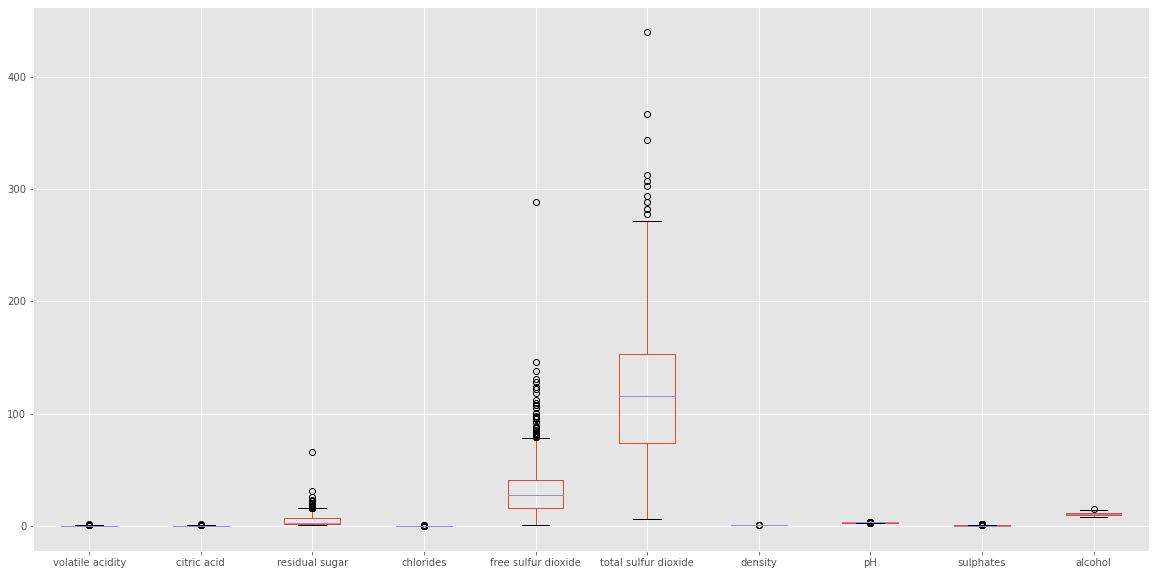

In [17]:
boxplot1 = df_wine.boxplot(column=['volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
                              'total sulfur dioxide','density','pH','sulphates','alcohol'], figsize = (20,10))

Dado que la creación de un vino es meramente una reacción química, los valores extremos que se presentan podrían considerarse aptos. Podríamos pensar que dichos outliers pertenecen a vinos que tienen características muy diferentes al resto.

Veremos cómo funcionan nuestros datos teniendo en cuenta los outliers; En caso necesario, consideraremos eliminarlos. (Será interesante para la Regresión)

## * Visualización:



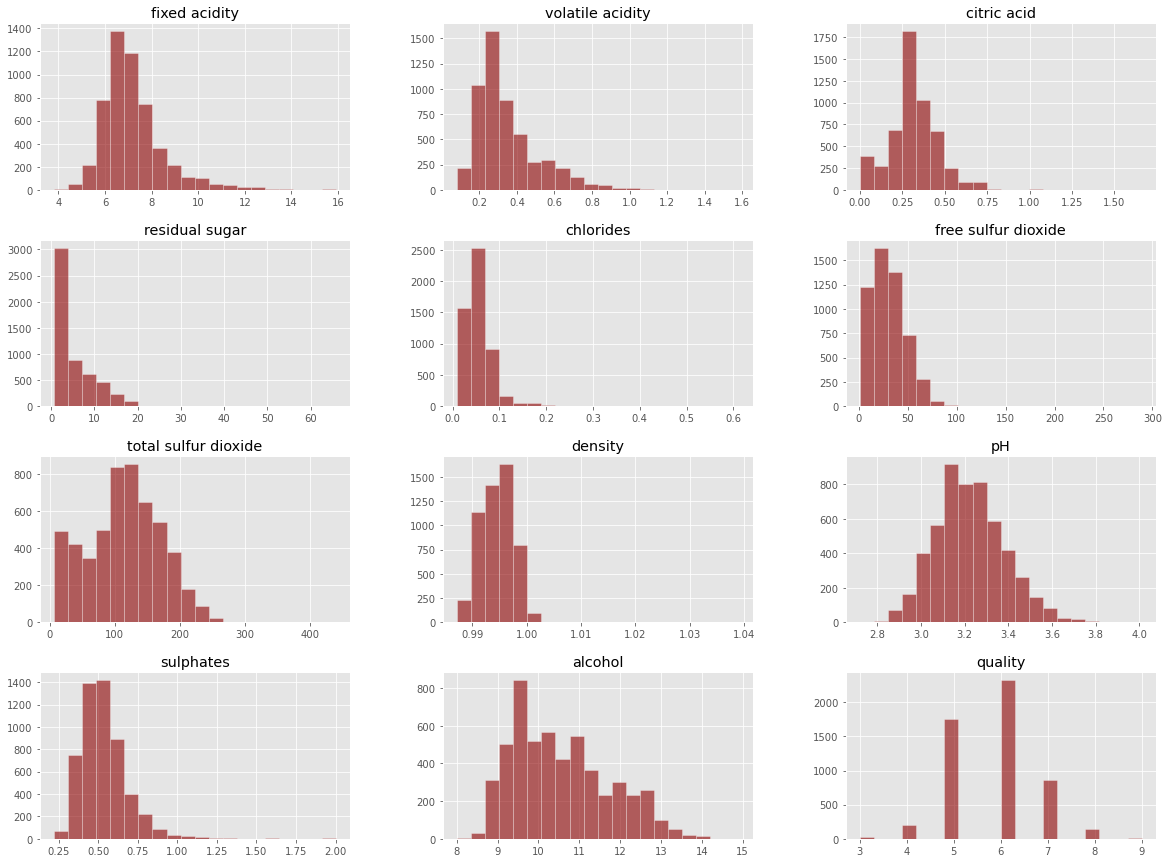

In [18]:
df_wine.hist(figsize=(20,15),ec='white',bins=20,color='darkred',alpha=0.6)
plt.show()

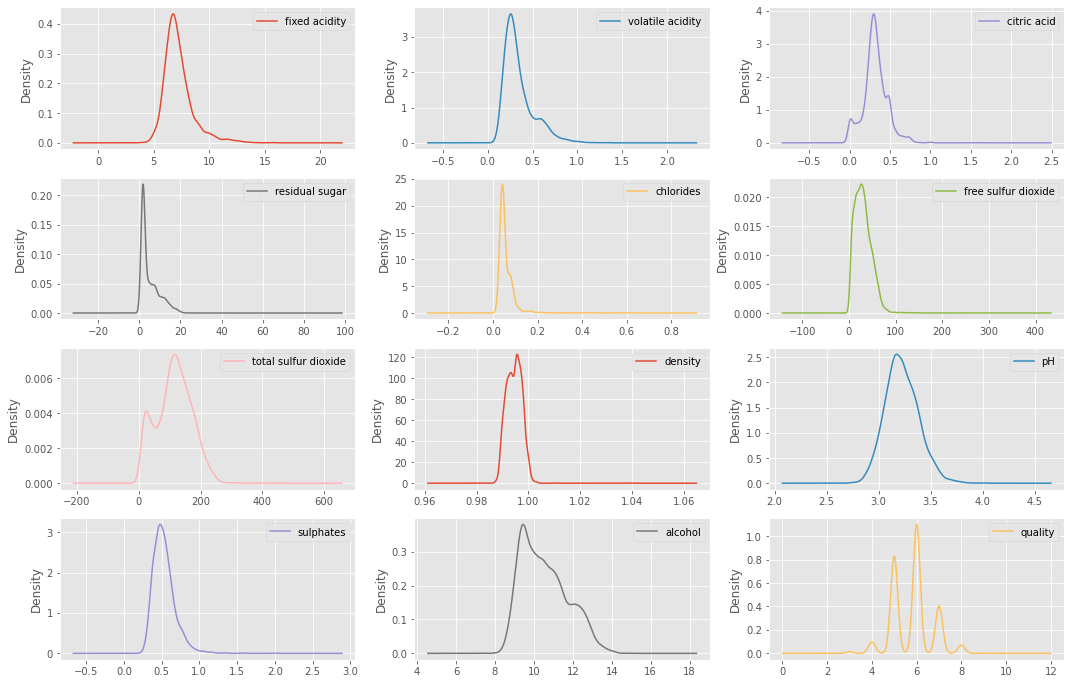

In [19]:
# Densidad de datos 
df_wine.plot(kind='density', subplots = True, layout=(4,3), sharex=False, figsize=(18,12));

-El valor medio de alcohol aumenta, aunque muy poco, a medida que aumenta el nivel de calidad.

-El valor promedio de acidez volátil disminuye a medida que aumenta el nivel de calidad.

-El valor medio de sulfatos disminuye a medida que aumenta el nivel de calidad.

-Aunque existen diferencias en los valores promedio de azúcar residual y anhídrido sulfuroso total según el nivel de calidad, no tienen una relación creciente o decreciente con el nivel de calidad.

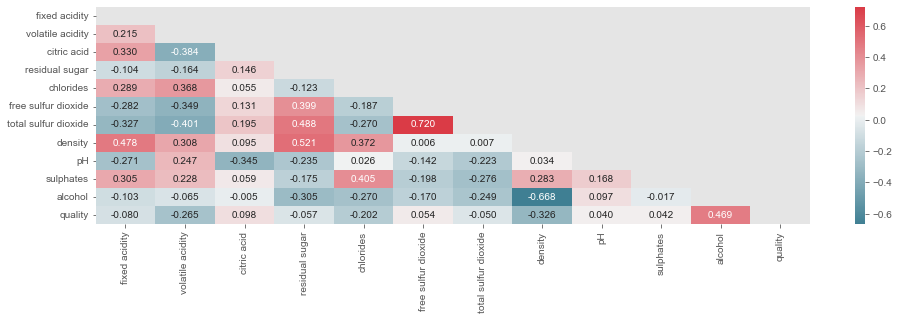

In [20]:
# Correlación entre variables

correlation = df_wine.corr()

plt.figure(figsize=(16,4))
corr = np.zeros_like(correlation)
corr[np.triu_indices_from(corr)] = True

sns.heatmap(correlation, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".3f", mask=corr)
sns.set(font_scale=1)


#### Comentarios:

La gráfica de correlación muestra que hay algunas variables fuertemente correlacionadas entre sí. Habrá que tenerlo en cuenta a la hora de establecer nuestros modelos ML.
Algunas relaciones que se pueden ver son:

 - La variable dependiente "calidad" del vino está altamente relacionada con el "alcohol". Más que cualquier otra variable, el "Alcohol" es la que más correlacionada con la "calidad" en un 0.47, seguida por la "densidad" en -0.33 , y la "volatilidad acidez"  en -0.27. Estas últimas correlacionan de manera negativa.

 - Fuertemente relacionadas pero de manera inversa, también tenemos el "Alcohol" y la "Densidad" en -0.67.

Otras relaciones que podemos observar:

 - El Dióxido de Sulfuro Total está directamente relacionado con el Dióxido de Sulfuro Libre en 0.72; Era previsible, puesto que el libre se encuentra en el total. A mayores se aprecia

 - La Ácidez Fija está relacionada directamente con la Densidad.

 - El Acido Citrico está relacionado directamente con la "acidez fija", 0.33, y de manera inversa con la "acidez volatil" -0.38.

 - El pH está altamente relacionado de manera inversa con el "ácido cítrico" y la "acidez Fija". Y tiene todo el sentido, puesto que ya comentamos que el pH mide la acidez.


Visualizamos las correlaciones más altas:

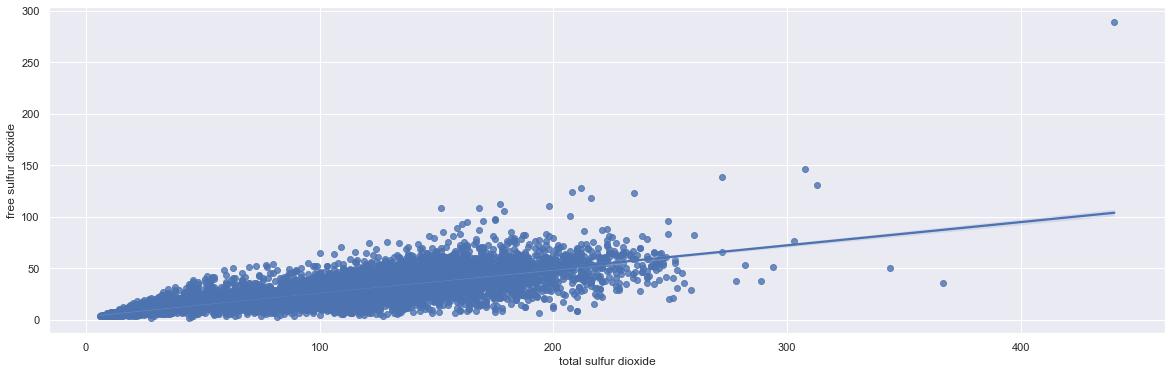

In [23]:
plt.figure(figsize=(20,6))
sns.regplot(x='total sulfur dioxide', y="free sulfur dioxide", data=df_wine)
plt.show()

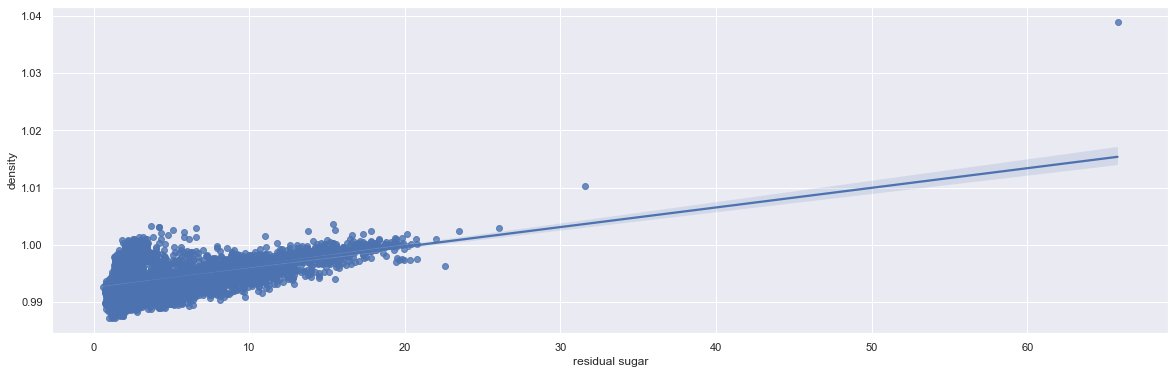

In [24]:
plt.figure(figsize=(20,6))
sns.regplot(x='residual sugar', y="density", data=df_wine)
plt.show()

Con el estudio de la correlaciones entre las variables dos a dos no considero necesario eliminar ninguna variable del estudio, puesto que cada una aporta valor.

##### Veamos qué ocurre al observar la multicolinealidad:



### Vamos a ver si existe multicolinealidad, y para ello emplearemos el VIF:

In [25]:
# Realizaremos una copia de nuestro dataset para mantener un dataset sin ningún tipo de cambio:
df_wine_origin = df_wine.copy(deep=True)

# Separamos las variables que emplearemos como target
target_color = 'color'
target_quality = 'quality'

columns_df = df_wine.columns.to_list()
columns_df.remove(target_color)
columns_df.remove(target_quality)


x_pred = df_wine[columns_df]

In [26]:
# Comprobamos que las dimensiones cuadran con lo que debería ser. Es decir el total de var. predictoras debe ser 11.

print(len(columns_df))

11


Revisando en internet cómo poder calcular con Python los valores del factor de inflación de la varianza encontré en la página de 
[profesordata](https://profesordata.com/2020/08/22/metodos-de-seleccion-de-variables-el-factor-de-inflacion-de-la-varianza/) la función empleada, utilizando sklearn y que describo al inicio.

In [28]:
# Probamos la función:
calculateVIF(x_pred.copy(deep=True)).T

VIF
fixed acidity          4.882077
volatile acidity       1.957219
citric acid            1.654623
residual sugar         6.428070
chlorides              1.632266
free sulfur dioxide    2.136488
total sulfur dioxide   2.932805
density               14.921847
pH                     2.480073
sulphates              1.547848
alcohol                4.575001

Existe multicolinealidad para "residual sugar" y "density", puesto que su VIF > 5. Esto se corresponde con lo que vimos a la hora de estudiar nuestras variables, puesto que los vinos más dulces tienen mayor densidad.
Podríamos  descartar alguna de estas variables antes de pasar a la construcción del modelo o arriesgarnos a construir un modelo con alta multicolinealidad. 

Vamos a eliminar la densidad, utilizando la función "selectDataUsingVIF" definida al inicio.

In [30]:
calculateVIF(selectDataUsingVIF(x_pred)).T

VIF
fixed acidity         1.801547
volatile acidity      1.710530
citric acid           1.654130
residual sugar        1.441546
chlorides             1.571734
free sulfur dioxide   2.136401
total sulfur dioxide  2.825818
pH                    1.398729
sulphates             1.355218
alcohol               1.361705

Tras eliminar "density" ningún valor de VIF es > 5. Con lo que aceptamos que el resto de variables no presentan multicolinealidad.

## * Transformaciones:

#### - Variable "color":

Transformamos nuestra variable categórica color en numérica, según lo siguiente:
 - red = 0
 - white = 1

In [32]:
label_encoder = LabelEncoder()
label_encoder.fit(df_wine["color"])

df_wine["color"] = label_encoder.transform(df_wine["color"])
print(df_wine.head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           5.20              0.34         0.00             1.8      0.050   
1           6.20              0.55         0.45            12.0      0.049   
2           7.15              0.17         0.24             9.6      0.119   
3           6.70              0.64         0.23             2.1      0.080   
4           7.60              0.23         0.34             1.6      0.043   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 27.0                  63.0  0.99160  3.68       0.79   
1                 27.0                 186.0  0.99740  3.17       0.50   
2                 56.0                 178.0  0.99578  3.15       0.44   
3                 11.0                 119.0  0.99538  3.36       0.70   
4                 24.0                 129.0  0.99305  3.12       0.70   

   alcohol  quality  color  
0     14.0        6      0  
1      9.3        6      1  

In [33]:
df_wine["color"].value_counts()

1    3961
0    1359
Name: color, dtype: int64

Vemos como el vino blanco es el predominante.

Los vinos tintos y blancos tienen características diferentes, y las distintas variables afectan a su calidad de manera diferente según su color.

<Figure size 800x640 with 0 Axes>

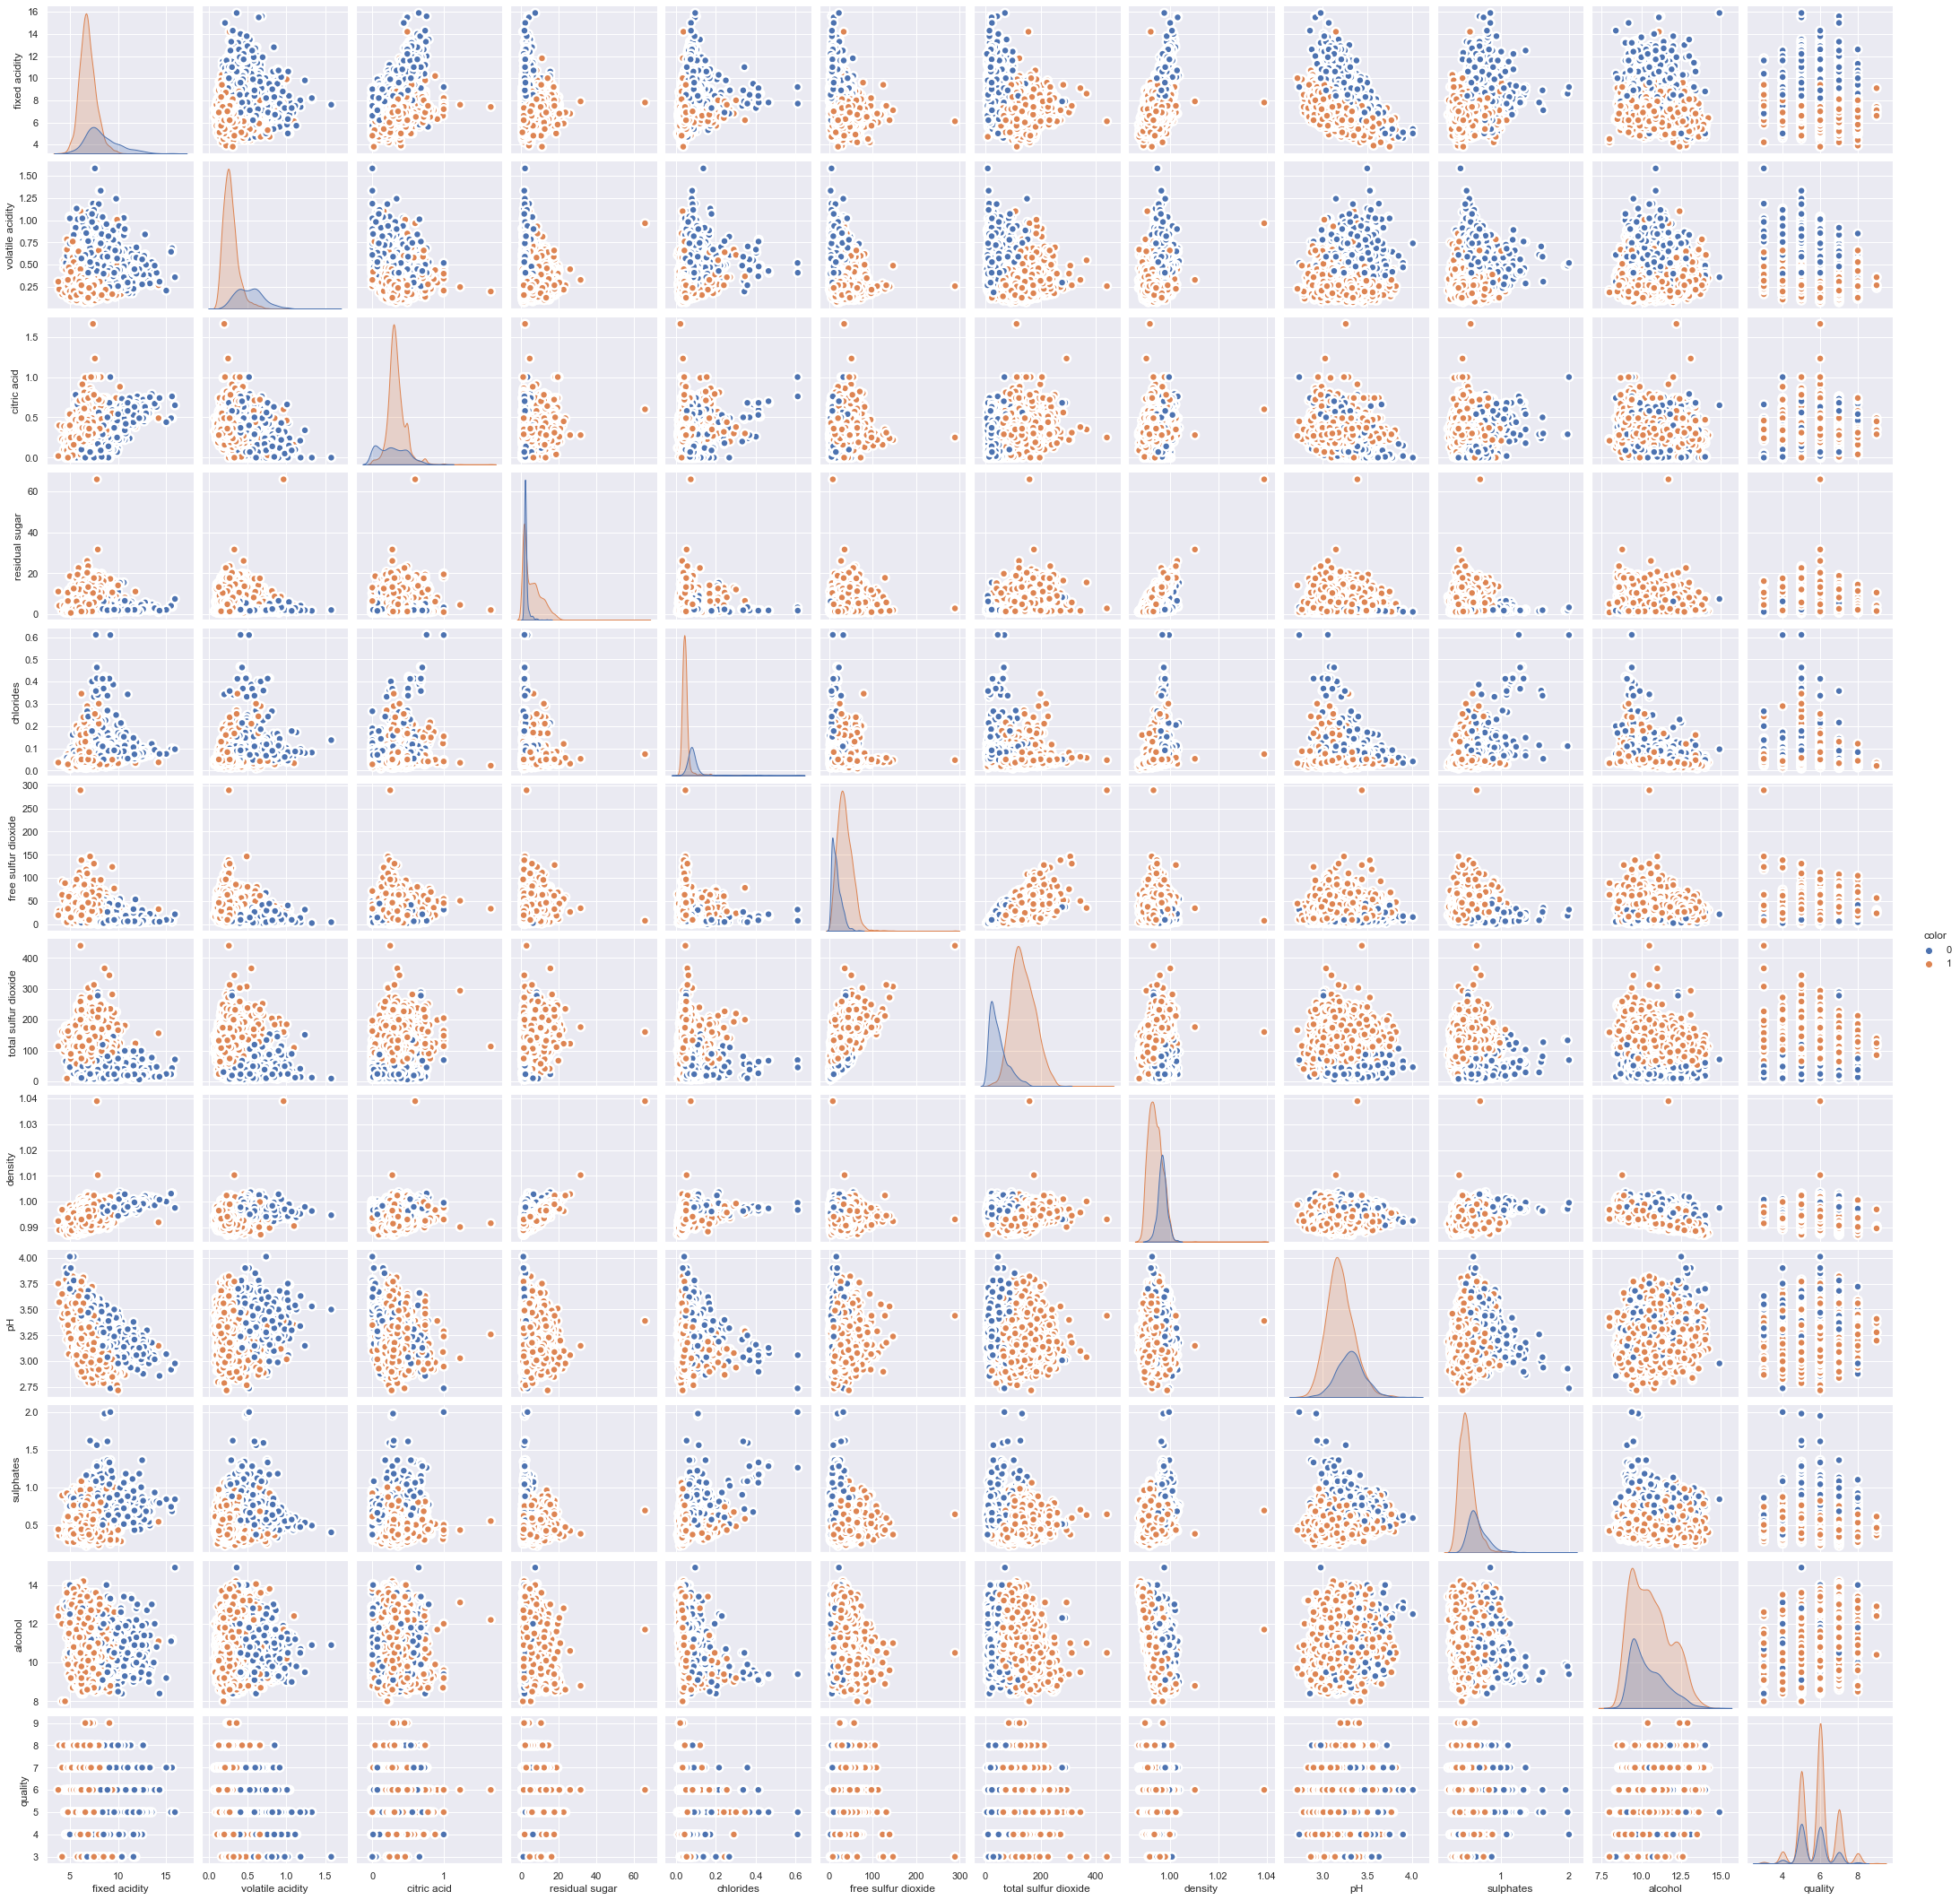

In [34]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df_wine, kind="scatter", hue="color", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show();

Observamos cómo el color del vino correlaciona de forma fuerte y negativa con el "volatile acidity", el "fixed acidity", "sulphates", y "chlorides".
Por otra parte presenta correlación positiva con el "total sulfur dioxide" y el "free sulfur dioxide".

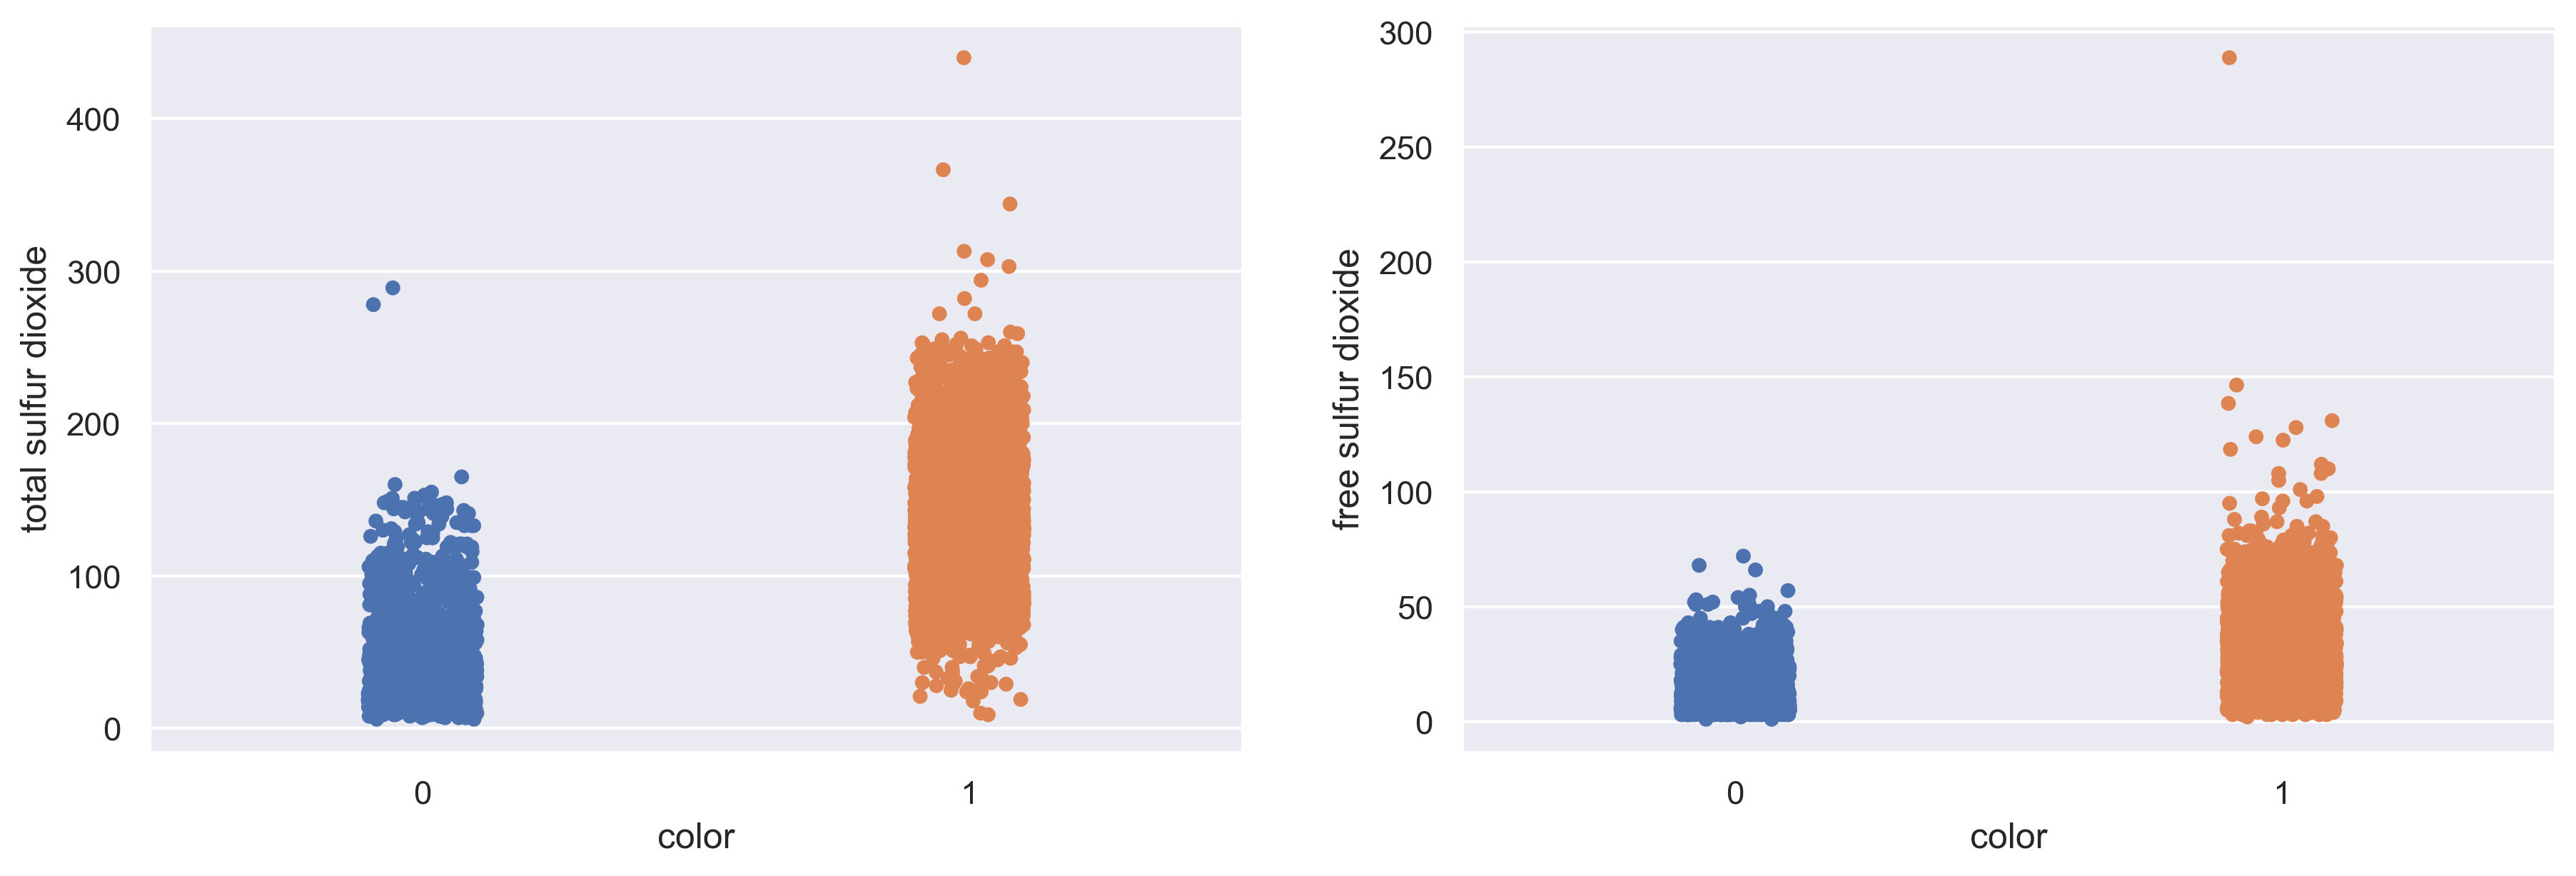

In [35]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(14.5, 4.5)
fig.dpi = 300
sns.stripplot(data=df_wine, x="color", y="total sulfur dioxide", jitter=True, ax=ax1)
sns.stripplot(data=df_wine, x="color", y="free sulfur dioxide", jitter=True, ax=ax2);

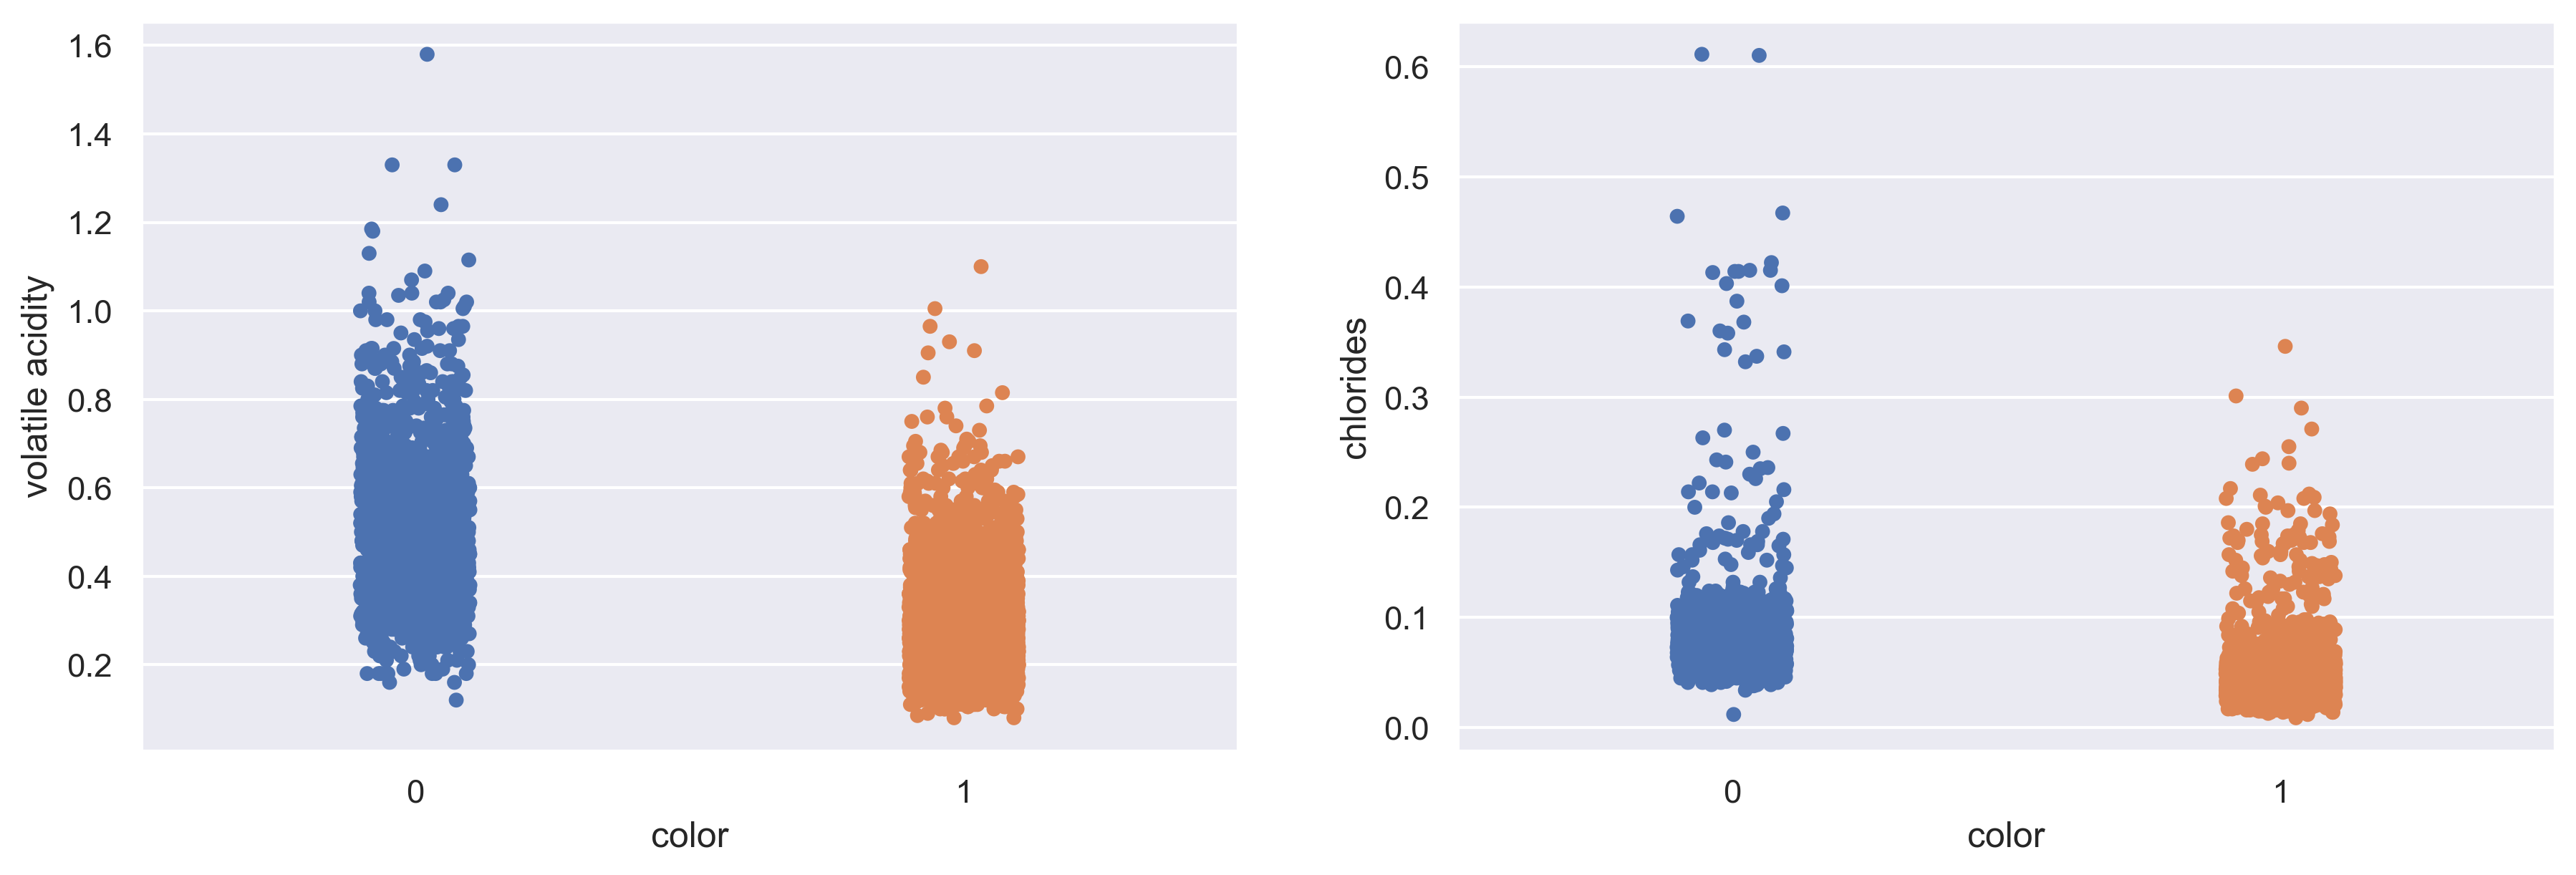

In [36]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(14.5, 4.5)
fig.dpi = 300
sns.stripplot(data=df_wine, x="color", y="volatile acidity", jitter=True, ax=ax1)
sns.stripplot(data=df_wine, x="color", y="chlorides", jitter=True, ax=ax2);


#### - Variable "quality":

In [37]:
df_wine.groupby("quality").quality.count()

quality
3      30
4     206
5    1752
6    2323
7     856
8     148
9       5
Name: quality, dtype: int64

Observamos que no se otorga calificación de calidad 1, 2 y 10.
Solo se obtienen puntajes entre 3 y 9.

Tiene la mayoría de los valores concentrados en las categorías 5, 6 y 7.
Pocas observaciones clasificadas con las categorías 3 y 9.

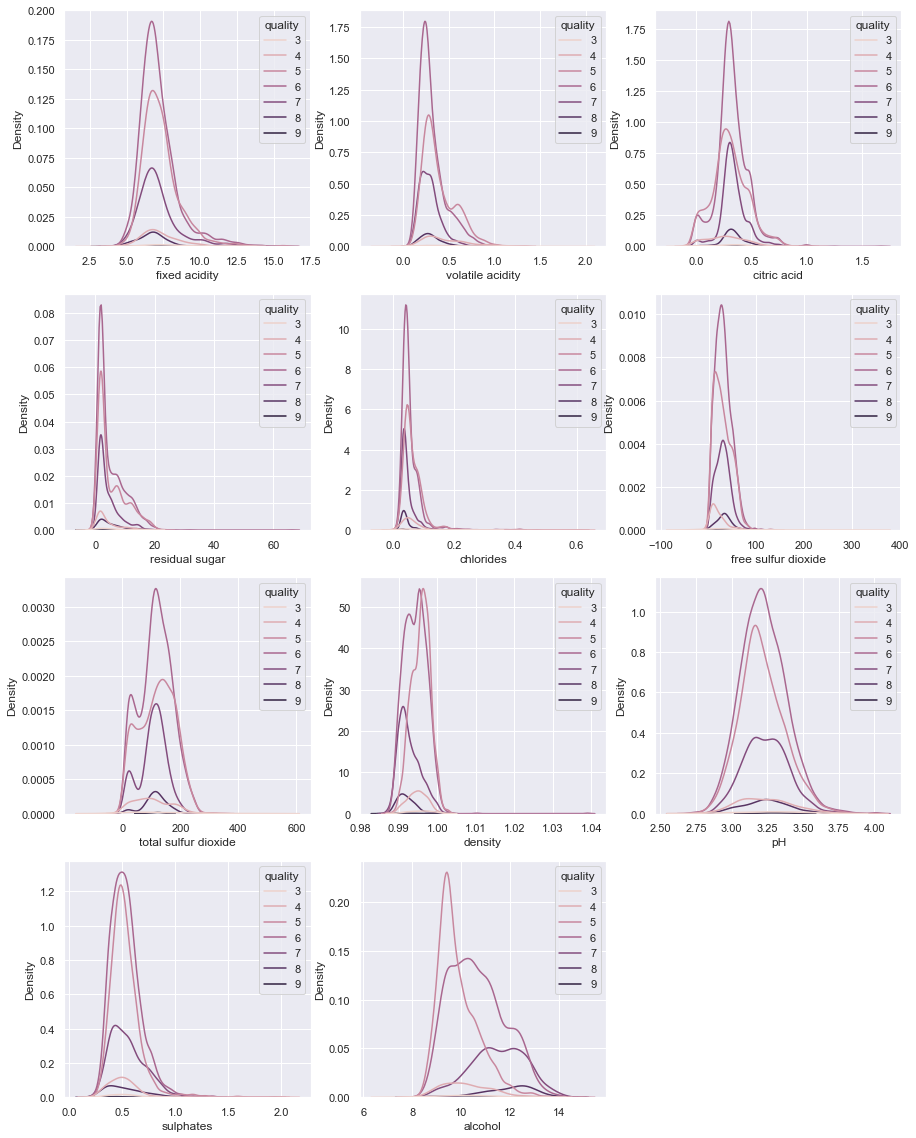

In [38]:
sns.set()
fig = plt.figure(figsize = [15,20])
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 
        'residual sugar', 'chlorides', 'free sulfur dioxide',
        'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.kdeplot(data = df_wine, x = col, hue = 'quality')
    cnt+=1
plt.show()

Al usar un histograma normalizado (que permite una representación más clara debido al desequilibrio) con una división de la calidad a través del tono, nos permite notar las diferencias en las características que determinan la calidad.

Algunas de las diferencias que vemos son:

 - La acidez volátil parece ser más baja en general para los vinos tintos de buena calidad.
 - El ácido cítrico parece ser mayor en los vinos de mejor calidad
 - El vino de buena calidad tiene un dióxido de azufre total más bajo.
 - Alcohol, como se mencionó anteriormente: las cantidades más altas tienden a estar en vinos tintos de buena calidad.
 - Los sulfatos parecen ser más altos en los vinos de mejor calidad
 - Ligeramente menor densidad en vinos de mejor calidad
Esto podría ayudarnos potencialmente en la selección de funciones.

Las características restantes del gráfico anterior que no parecen mostrar diferencias cuando se tiene en cuenta la calidad son:

     - Acidez Fija
     - azúcar residual
     - Dióxido de azufre libre
     - Dióxido de azufre total
     - pH

Examinaremos esto más a fondo evaluando cómo se relaciona con otras características sin dejar de tener en cuenta la calidad del vino a continuación:

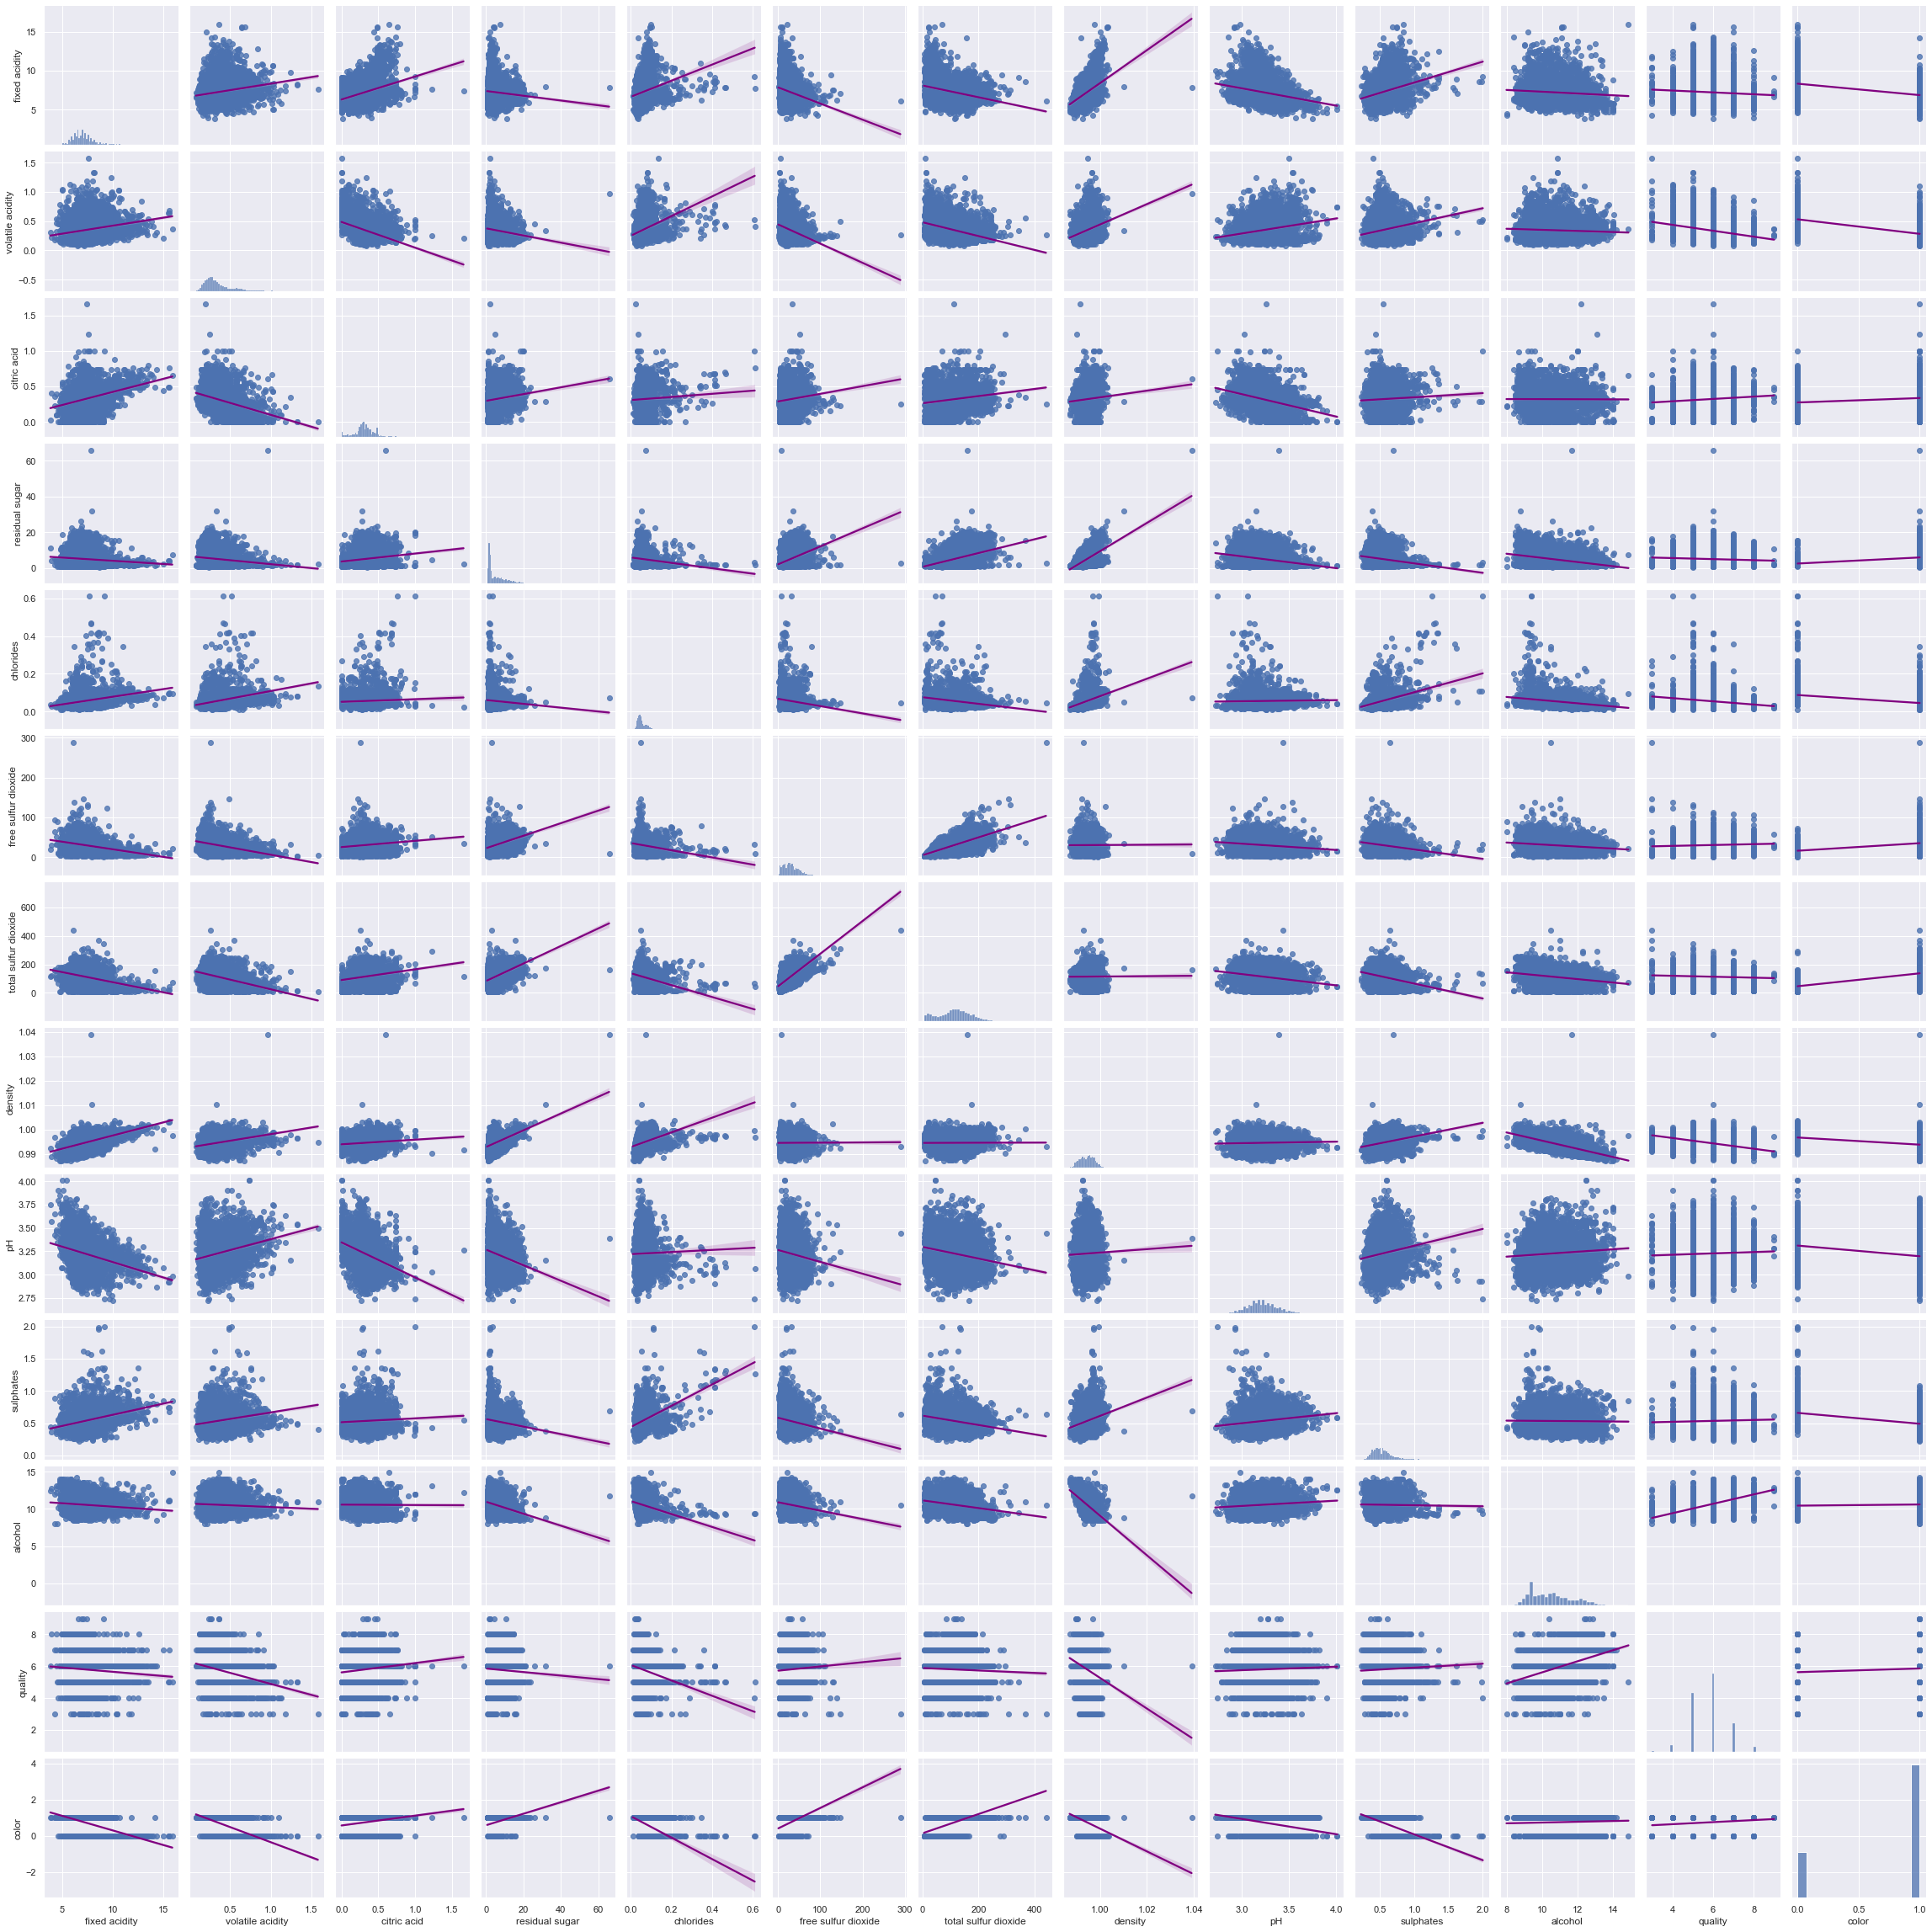

In [39]:
sns.pairplot(df_wine, kind='reg', plot_kws={'line_kws':{'color':'purple'}})
plt.show()

##### - Vemos la relación entre la calidad y la clase de vino:

In [40]:
counts = df_wine.groupby(['quality' , 'color']).count()['pH']

In [41]:
total = df_wine.groupby('color').count()['pH']

In [42]:
proporations = counts / total

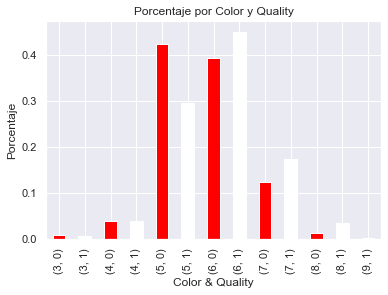

In [43]:
proporations.plot(kind = 'bar'  , color = ['red' , 'white'] )
plt.xlabel('Color & Quality')
plt.ylabel('Porcentaje')
plt.title('Porcentaje por Color y Quality')
plt.show()

In [44]:
# Listamos el nombre de las columnas y las features:

columnas = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
            "total sulfur dioxide","density","pH","sulphates","alcohol","quality","color"]

features = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
            "total sulfur dioxide","density","pH","sulphates","alcohol"]

### Separación del dataset en training y testing:

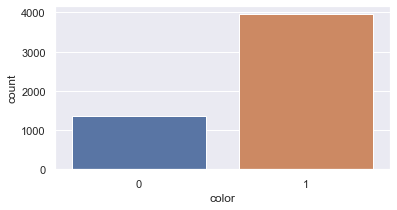

In [45]:
plt.figure(figsize=(6,3))
sns.countplot(df_wine['color'])
plt.show()

In [46]:
porcentaje_malo = len(df_wine[df_wine['color']==0])/len(df_wine)
porcentaje_bueno = 1-porcentaje_malo


print(f"Hay un {np.round(porcentaje_malo, 3)}% con respecto a la clase 0 (vino tinto)")
print(f"Hay un {np.round(porcentaje_bueno,3)}% con respecto a la clase 1 (vino blanco)")

Hay un 0.255% con respecto a la clase 0 (vino tinto)
Hay un 0.745% con respecto a la clase 1 (vino blanco)


Menos de un 30% de los datos, ya podemos considerarlo desbalanceado.

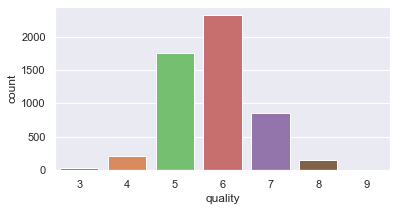

In [47]:
plt.figure(figsize=(6,3))
sns.countplot(df_wine['quality'],palette="muted")
plt.show()

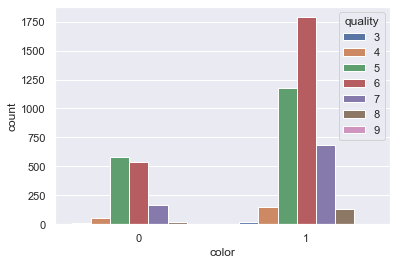

In [48]:
sns.countplot(x = 'color', hue = 'quality', data = df_wine);

--- Vemos que para nuestras variable objetivo color existen menos ejemplos para vinos blanco que para tintos.

--- Observamos que para nuestras variable objetivo quality los datos se concentran entorno a los valores 5 y 6.


Para ambos casos debemos reducir ese desequilibrio, y para ello utilizaremos "stratify":

### ---- Separación train y test para la Clasificación:

Definición de variables y división de los datos

In [49]:
# la submatriz X contiene los valores de las primeras 11 columnas del dataframe y todas las filas. Variables independientes.
X = df_wine.iloc[:,0:12]

# Separo la target: "color" 

y_color = df_wine.iloc[:,12]


In [50]:
X.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           5.20              0.34         0.00             1.8      0.050   
1           6.20              0.55         0.45            12.0      0.049   
2           7.15              0.17         0.24             9.6      0.119   
3           6.70              0.64         0.23             2.1      0.080   
4           7.60              0.23         0.34             1.6      0.043   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 27.0                  63.0  0.99160  3.68       0.79   
1                 27.0                 186.0  0.99740  3.17       0.50   
2                 56.0                 178.0  0.99578  3.15       0.44   
3                 11.0                 119.0  0.99538  3.36       0.70   
4                 24.0                 129.0  0.99305  3.12       0.70   

   alcohol  quality  
0     14.0        6  
1      9.3        6  
2     10.2        6  
3     10.9        5  
4     10.4        5

In [51]:
# Separo las variables independientes:

features_clas = list(df_wine.columns)
features_clas.remove('color')

target_clas = "color"

X_clas = df_wine[features_clas]
y_clas = df_wine[target_clas]

In [52]:
X_train_clas, X_test_clas, y_train_clas, y_test_clas = train_test_split(X_clas, y_clas, train_size=0.8, test_size=0.2,
                                                                        stratify=df_wine[["color"]])

In [53]:
df_clasificación = X_train_clas
df_clasificación ['color'] = y_train_clas
df_clasificación_new = X_test_clas
df_clasificación_new['color'] = y_test_clas

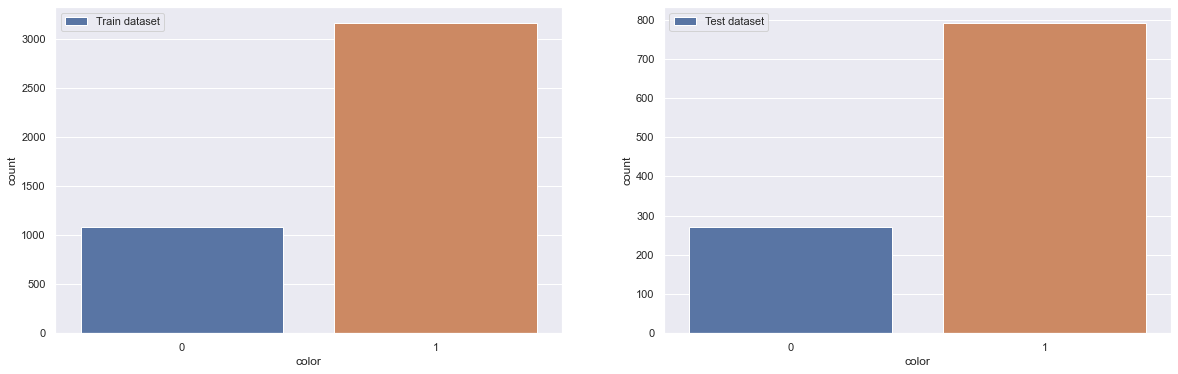

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
sns.countplot(df_clasificación['color'], label='Train dataset', ax=ax1)
sns.countplot(df_clasificación_new['color'], label='Test dataset', ax=ax2)
ax1.legend()
ax2.legend()
plt.show()

No hemos hecho ninguna acción (como podría ser descartar variables, estandarizar features o eliminar outliers) antes de separar el conjunto de test.

### ---- Separación train y test para la Regresión:

Al observar la target "quality" observamos que los datos estaban concentrados en valores 5,6 y 7. Por ello utilizaremos "stratify" para evitar el desequilibrio.

In [55]:
# Separo las variables independientes:

features_reg = list(df_wine.columns)
features_reg.remove('quality')

target_reg = "quality"

X_reg = df_wine[features_reg]
y_reg = df_wine[target_reg]

In [56]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, train_size=0.8, test_size=0.2,
                                                                        stratify=df_wine[["quality"]])

In [57]:
df_regresión = X_train_reg
df_regresión['quality'] = y_train_reg
df_regresión_new = X_test_reg
df_regresión_new['quality'] = y_test_reg

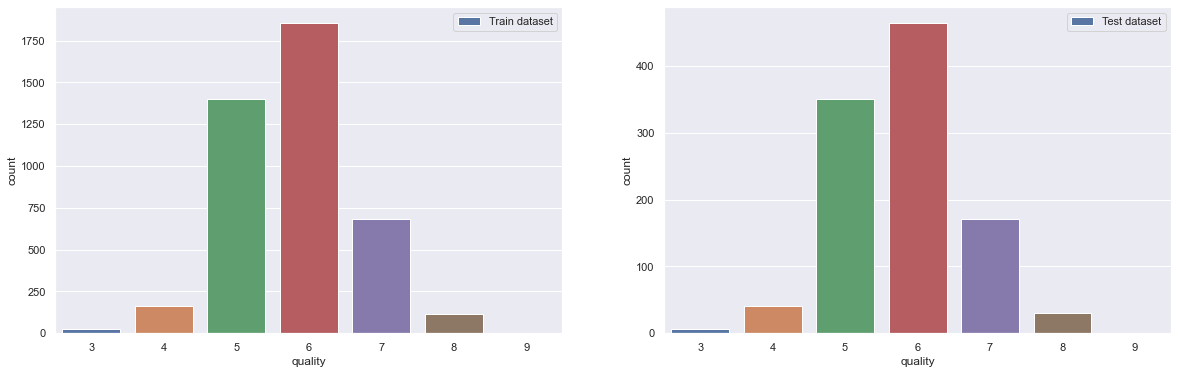

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
sns.countplot(df_regresión['quality'], label='Train dataset', ax=ax1)
sns.countplot(df_regresión_new['quality'], label='Test dataset', ax=ax2)
ax1.legend()
ax2.legend()
plt.show()




## 2º .- Hacer un modelo capaz de clasificar lo mejor posible si un vino es blanco o rojo a partir del resto de variables

No podemos saber qué modelo de clasificación va a ser el que mejor funcione para nuestro dataset. Tendremos que probar distintos clasificadores, y ver cuál es el que mejor se comporta.

In [59]:
# Listamos el nombre de las columnas y las features:

features_clas = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
            "total sulfur dioxide","density","pH","sulphates","alcohol", "quality"]

target_clas = "color"

X_clas = df_wine[features_clas]
y_clas = df_wine[target_clas]

In [60]:
train_clas, test_clas = train_test_split(df_wine,
                               train_size=0.8,
                               test_size=0.2, stratify=df_wine[["color"]])

#### 1.- Regresión Logística:

In [61]:
# Defino un escalador, con un nuevo StandardScaler y defino el modelo, en este caso la Regresión logística:

escalador = StandardScaler()
lr = LogisticRegression(random_state=42,n_jobs=-1,max_iter=1000,C=0.1)

In [62]:
# Creo el pipeline:
pipe_rl = Pipeline (steps=[("rl",LogisticRegression(random_state = 42))])

# Búsqueda de hiperparámetros:
param_rl = {"rl__penalty": ["l1","l2"],
                "rl__max_iter" : [50, 100, 500],
                "rl__fit_intercept": [True],
                "rl__C": [0.1, 0.5, 1.0, 5.0],
                "rl__solver": ["liblinear"]
               } 

# GridSearch: Ahora necesitamos un CV; definimos una instancia de GridSearch:
gs_rl = GridSearchCV(estimator = pipe_rl,
                        param_grid = param_rl,
                        n_jobs=-1,
                        cv=10,
                        verbose=1)

In [63]:
gs_rl.fit(train_clas[features_clas], train_clas["color"])

print("Puntuación: " + str (gs_rl.best_score_))
print("Mejor parámetro: " + str (gs_rl.best_params_))


Fitting 10 folds for each of 24 candidates, totalling 240 fits
Puntuación: 0.9863661971830988
Mejor parámetro: {'rl__C': 5.0, 'rl__fit_intercept': True, 'rl__max_iter': 50, 'rl__penalty': 'l1', 'rl__solver': 'liblinear'}


#### 2.- Árbol de decisión: 

In [64]:
# No hay estandarización:

arbol = DecisionTreeClassifier(random_state=42)

In [65]:
# Creo el pipeline:
pipe_arbol = Pipeline (steps=[("arbol",DecisionTreeClassifier())])

# Búsqueda de hiperparámetros:
param_arbol = {"arbol__max_depth": [2,5,10]}

# GridSearch: Ahora necesitamos un CV; definimos una instancia de GridSearch:
gs_arbol = GridSearchCV(estimator = pipe_arbol,
                        param_grid = param_arbol,
                        n_jobs=-1,
                        cv=10,
                        verbose=1)

In [66]:
gs_arbol.fit(train_clas[features_clas], train_clas["color"])

print("Puntuación: " + str (gs_arbol.best_score_))
print("Mejor parámetro: " + str (gs_arbol.best_params_))

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Puntuación: 0.981674123170395
Mejor parámetro: {'arbol__max_depth': 5}


#### 3.- K-nearest Neighbors:

In [67]:
# Defino un escalador, con un nuevo StandardScaler y defino el modelo:

escalador = StandardScaler()
neighbors = KNeighborsClassifier()

In [68]:
# Creo el pipeline:
pipe_neighbors = Pipeline (steps=[("escalador",StandardScaler()),
                            ("neighbors",KNeighborsClassifier())])

# Búsqueda de hiperparámetros:
param_neighbors = {"neighbors__n_neighbors": [1,3,5,7,9,11],
                   "neighbors__weights": ["uniform","distance"]
                   }

# GridSearch: Ahora necesitamos un CV; definimos una instancia de GridSearch:
gs_neighbors = GridSearchCV(estimator = pipe_neighbors,
                        param_grid = param_neighbors,
                        n_jobs=-1,
                        cv=10,
                        verbose=1)

In [69]:
gs_neighbors.fit(train_clas[features_clas], train_clas["color"])

print("Puntuación: " + str (gs_neighbors.best_score_))
print("Mejor parámetro: " + str (gs_neighbors.best_params_))

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Puntuación: 0.9931836509251589
Mejor parámetro: {'neighbors__n_neighbors': 9, 'neighbors__weights': 'uniform'}


Esto quiere decir que hemos acertado si es 0 o 1 en el 99% de los casos del dataset de testing (Accuracy)

#### 4.- Naïve Bayes:

In [70]:
# Defino un escalador, con un nuevo StandardScaler y defino el modelo:

escalador = StandardScaler()
nB = GaussianNB()

In [71]:
# Creo el pipeline:
pipe_nB = Pipeline (steps=[("nB",GaussianNB())])


# Búsqueda de hiperparámetros:no hay
        

# GridSearch: Ahora necesitamos un CV; definimos una instancia de GridSearch:
gs_nB = GridSearchCV(pipe_nB,
                        {},              # no hay grid
                        n_jobs=-1,
                        verbose=1,
                        cv=10)

In [72]:
gs_nB.fit(train_clas[features_clas], train_clas["color"])

print("Puntuación: " + str (gs_nB.best_score_))
print("Mejor parámetro: " + str (gs_nB.best_params_))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Puntuación: 0.9701563104114885
Mejor parámetro: {}


#### 5.- SVM:

In [73]:
# Defino un escalador, con un nuevo StandardScaler y defino el modelo:

escalador = StandardScaler()
svm = SVC()

In [74]:
# Creo el pipeline:
pipe_svm = Pipeline (steps=[("escalador",StandardScaler()),
                            ("svm",SVC(random_state = 42))])


# Búsqueda de hiperparámetros:
param_svm = {"svm__C": [0.01, 0.1, 0.5, 1.0, 5.0],
            "svm__degree": [2,3,4,5],
            "svm__gamma": [0.001, 0.1, "auto", 1.0, 10.0]
            }

# GridSearch: Ahora necesitamos un CV; definimos una instancia de GridSearch:
gs_svm = GridSearchCV(estimator = pipe_svm,
                        param_grid = param_svm,
                        n_jobs=-1,
                        cv=10,
                        verbose=1)

In [75]:
gs_svm.fit(train_clas[features_clas], train_clas["color"])

print("Puntuación: " + str (gs_svm.best_score_))
print("Mejor parámetro: " + str (gs_svm.best_params_))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Puntuación: 0.9957696768848384
Mejor parámetro: {'svm__C': 0.5, 'svm__degree': 2, 'svm__gamma': 'auto'}


In [76]:
gs_svm.best_estimator_.get_params()

{'memory': None,
 'steps': [('escalador', StandardScaler()),
  ('svm', SVC(C=0.5, degree=2, gamma='auto', random_state=42))],
 'verbose': False,
 'escalador': StandardScaler(),
 'svm': SVC(C=0.5, degree=2, gamma='auto', random_state=42),
 'escalador__copy': True,
 'escalador__with_mean': True,
 'escalador__with_std': True,
 'svm__C': 0.5,
 'svm__break_ties': False,
 'svm__cache_size': 200,
 'svm__class_weight': None,
 'svm__coef0': 0.0,
 'svm__decision_function_shape': 'ovr',
 'svm__degree': 2,
 'svm__gamma': 'auto',
 'svm__kernel': 'rbf',
 'svm__max_iter': -1,
 'svm__probability': False,
 'svm__random_state': 42,
 'svm__shrinking': True,
 'svm__tol': 0.001,
 'svm__verbose': False}

#### 6.- Red Neuronal:

In [77]:
# Defino un escalador, con un nuevo StandardScaler y defino el modelo:

escalador = StandardScaler()
mlp = MLPClassifier()

In [78]:
# Creo el pipeline:
pipe_mlp = Pipeline (steps=[("escalador",StandardScaler()),
                            ("mlp", MLPClassifier(random_state = 42))])


# Búsqueda de hiperparámetros:
param_mlp = {"mlp__hidden_layer_sizes": (10,10,5,5,30,50,100),
             "mlp__validation_fraction": [0.1],
             "mlp__max_iter": [4000],
             "mlp__early_stopping": [True],
             "mlp__learning_rate_init": [0.001, 0.1, 0.5]
             }

# GridSearch: Ahora necesitamos un CV; definimos una instancia de GridSearch:
gs_mlp = GridSearchCV(estimator = pipe_mlp,
                        param_grid = param_mlp,
                        n_jobs=-1,
                        cv=10,
                        verbose=1)

In [79]:
gs_mlp.fit(train_clas[features_clas], train_clas["color"])

print("Puntuación: " + str (gs_mlp.best_score_))
print("Mejor parámetro: " + str (gs_mlp.best_params_))

Fitting 10 folds for each of 21 candidates, totalling 210 fits
Puntuación: 0.9943606738470037
Mejor parámetro: {'mlp__early_stopping': True, 'mlp__hidden_layer_sizes': 30, 'mlp__learning_rate_init': 0.1, 'mlp__max_iter': 4000, 'mlp__validation_fraction': 0.1}


#### 7.- Modelos de Ensemble:

##### * Random Forest (Bagging): 

A la vez que lanzo un Random Forest tiro un ExtraTrees porque normalmente funciona muy bien.

In [80]:
# No hay estandarización:

Rf = RandomForestClassifier()

In [81]:
# Creo el pipeline:
pipe_Rf = Pipeline (steps=[("Rf", RandomForestClassifier(random_state = 42))])


# Búsqueda de hiperparámetros:
param_Rf = {"Rf__n_estimators": [150],
            "Rf__max_depth" : [2, 4, 10, 20],
            "Rf__max_features": ["sqrt", 3, 4]
           }

# GridSearch: Ahora necesitamos un CV; definimos una instancia de GridSearch:
gs_Rf = GridSearchCV(estimator = pipe_Rf,
                        param_grid = param_Rf,
                        n_jobs=-1,
                        cv=10,
                        verbose=1)

In [82]:
gs_Rf.fit(train_clas[features_clas], train_clas["color"])

print("Puntuación: " + str (gs_Rf.best_score_))
print("Mejor parámetro: " + str (gs_Rf.best_params_))

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Puntuación: 0.9931847555923777
Mejor parámetro: {'Rf__max_depth': 10, 'Rf__max_features': 'sqrt', 'Rf__n_estimators': 150}


In [83]:
ET = ExtraTreesClassifier(n_estimators=500,max_depth=4,bootstrap=True,max_samples=0.8,verbose=2,random_state=42,n_jobs=-1)

In [84]:
ET.fit(train_clas[features_clas], train_clas["color"])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    0.0s


building tree 1 of 500
building tree 2 of 500building tree 3 of 500

building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500building tree 10 of 500
building tree 11 of 500

building tree 12 of 500
building tree 13 of 500building tree 14 of 500

building tree 15 of 500building tree 16 of 500

building tree 17 of 500
building tree 18 of 500
building tree 19 of 500building tree 20 of 500
building tree 21 of 500
building tree 22 of 500

building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500building tree 27 of 500

building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500building tree 32 of 500

building tree 33 of 500building tree 34 of 500

building tree 35 of 500building tree 36 of 500

building tree 37 of 500
building tree 38 of 500building tree 39 of 500

building tree 40 of 500
building tree 41 of 500
building tree 42 of 500bu

building tree 431 of 500building tree 432 of 500

building tree 433 of 500
building tree 434 of 500building tree 435 of 500
building tree 436 of 500

building tree 437 of 500
building tree 438 of 500building tree 439 of 500

building tree 440 of 500
building tree 441 of 500
building tree 442 of 500building tree 443 of 500
building tree 444 of 500
building tree 445 of 500
building tree 446 of 500

building tree 447 of 500
building tree 448 of 500building tree 449 of 500building tree 450 of 500


building tree 451 of 500building tree 452 of 500
building tree 453 of 500

building tree 454 of 500
building tree 455 of 500
building tree 456 of 500
building tree 457 of 500
building tree 458 of 500building tree 459 of 500building tree 460 of 500


building tree 461 of 500
building tree 462 of 500building tree 463 of 500

building tree 464 of 500
building tree 465 of 500
building tree 466 of 500
building tree 467 of 500
building tree 468 of 500building tree 469 of 500

building tree 470 of 500b

[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.3s finished


ExtraTreesClassifier(bootstrap=True, max_depth=4, max_samples=0.8,
                     n_estimators=500, n_jobs=-1, random_state=42, verbose=2)

##### * Gradient Boosting: 

In [85]:
# No hay estandarización:

Gb = GradientBoostingClassifier()

In [86]:
# Creo el pipeline:
pipe_Gb = Pipeline (steps=[("Gb", GradientBoostingClassifier(random_state = 42))])


# Búsqueda de hiperparámetros:
param_Gb = {"Gb__loss": ["deviance"],
            "Gb__learning_rate": [0.1, 0.5],
            "Gb__n_estimators": [10,30,100,150,300],
            "Gb__subsample": [0.5, 1.0],
            "Gb__max_depth": [1,3,5,9,11],
            }

# GridSearch: Ahora necesitamos un CV; definimos una instancia de GridSearch:
gs_Gb = GridSearchCV(estimator = pipe_Gb,
                        param_grid = param_Gb,
                        n_jobs=-1,
                        cv=10,
                        verbose=1)

In [87]:
gs_Gb.fit(train_clas[features_clas], train_clas["color"])

print("Puntuación: " + str (gs_Gb.best_score_))
print("Mejor parámetro: " + str (gs_Gb.best_params_))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Puntuación: 0.9945954156310413
Mejor parámetro: {'Gb__learning_rate': 0.5, 'Gb__loss': 'deviance', 'Gb__max_depth': 3, 'Gb__n_estimators': 150, 'Gb__subsample': 1.0}


##### Una vez que tenemos todos los modelos, vamos a ver cuál el es que mejor puntuación obtiene. Para ello agrupo todos los GridSearchCV :

In [88]:
conjunto_de_GridSearchs = {"gs_rl" : gs_rl,
                          "gs_arbol" : gs_arbol,
                          "gs_neighbors" : gs_neighbors,
                          "gs_nB" : gs_nB,
                          "gs_svm" : gs_svm,
                          "gs_mlp" : gs_mlp,
                          "gs_Rf" : gs_Rf,
                          "gs_Gb" : gs_Gb}


In [89]:
mejor_puntuación_GridSearch = [(modelo, grid_search.best_score_)
                               for modelo, grid_search in conjunto_de_GridSearchs.items()]

mejor_puntuación_GridSearch

[('gs_rl', 0.9863661971830988),
 ('gs_arbol', 0.981674123170395),
 ('gs_neighbors', 0.9931836509251589),
 ('gs_nB', 0.9701563104114885),
 ('gs_svm', 0.9957696768848384),
 ('gs_mlp', 0.9943606738470037),
 ('gs_Rf', 0.9931847555923777),
 ('gs_Gb', 0.9945954156310413)]

In [90]:
mejor_puntuación_GridSearch_df = pd.DataFrame(mejor_puntuación_GridSearch,
                                                 columns=["GridSearchCV", "Mejor score"])

mejor_puntuación_GridSearch_df_ordenado = (mejor_puntuación_GridSearch_df
                                              .sort_values(by="Mejor score", ascending=False)
                                             )

mejor_puntuación_GridSearch_df_ordenado

GridSearchCV  Mejor score
4        gs_svm     0.995770
7         gs_Gb     0.994595
5        gs_mlp     0.994361
6         gs_Rf     0.993185
2  gs_neighbors     0.993184
0         gs_rl     0.986366
1      gs_arbol     0.981674
3         gs_nB     0.970156

El gridsearch con el accuracy más alto en validación cruzada es el svm.

In [91]:
mejor_puntuación_GridSearch = conjunto_de_GridSearchs["gs_svm"]

Y dentro de este GridSearchCV, el mejor modelo (pipeline) ha resultado ser:

In [92]:
mejor_pipeline = mejor_puntuación_GridSearch.best_estimator_

mejor_pipeline.steps

[('escalador', StandardScaler()),
 ('svm', SVC(C=0.5, degree=2, gamma='auto', random_state=42))]

Ahora vamos a re-entrenar el modelo con todo el conjunto del train (ya sin validación cruzada). Gracias al argumento opcional refit=True que viene marcado por defecto en GridSearchCV ya estaría , pero lo re-entreno igual:

In [93]:
mejor_pipeline.fit(train_clas[features_clas], train_clas["color"])

Pipeline(steps=[('escalador', StandardScaler()),
                ('svm', SVC(C=0.5, degree=2, gamma='auto', random_state=42))])

Con nuestro mejor modelo ya seleccionado y entrenado con todo el conjunto de train, solo nos queda ver qué tal predice en el conjunto de test:

In [94]:
test_predicciones = mejor_pipeline.predict (test_clas[features_clas])
test_clas["predicciones"] = test_predicciones
test_clas

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1628            8.8              0.55         0.04             2.2      0.119   
1547            6.5              0.23         0.20             7.5      0.050   
779             5.6              0.16         0.27             1.4      0.044   
4126            7.1              0.20         0.41             2.1      0.054   
3481            7.1              0.14         0.33             1.0      0.104   
...             ...               ...          ...             ...        ...   
2694            6.8              0.18         0.32             7.2      0.047   
4429            7.3              0.23         0.34             9.3      0.052   
1644            7.6              0.20         0.26             4.8      0.033   
2652            5.3              0.47         0.11             2.2      0.048   
4319            6.7              0.13         0.29             5.3      0.051   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1628                 14.0                  56.0  0.99620  3.21       0.60   
1547                 44.0                 179.0  0.99504  3.18       0.48   
779                  53.0                 168.0  0.99180  3.28       0.37   
4126                 24.0                 166.0  0.99480  3.48       0.62   
3481                 20.0                  54.0  0.99057  3.19       0.64   
...                   ...                   ...      ...   ...        ...   
2694                 17.0                 109.0  0.99498  3.42       0.44   
4429                 19.0                  86.0  0.99574  3.04       0.56   
1644                 26.0                  76.0  0.99076  2.98       0.49   
2652                 16.0                  89.0  0.99182  3.54       0.88   
4319                 31.0                 122.0  0.99440  3.44       0.37   

        alcohol  quality  color  predicciones  
1628  10.900000        6      0             0  
1547   9.533333        5      1             1  
779   10.100000        6      1             1  
4126  10.500000        6      1             1  
3481  11.500000        6      1             1  
...         ...      ...    ...           ...  
2694  10.400000        6      1             1  
4429  10.000000        5      1             1  
1644  12.300000        7      1             1  
2652  13.600000        7      0             0  
4319   9.700000        6      1             1  

[1064 rows x 14 columns]

##### ------ Métricas de Clasificación:

In [95]:
# Accuracy:
accuracy_en_test = accuracy(y_true = test_clas["color"],
                            y_pred = mejor_pipeline.predict(test_clas[features_clas])
                             )

print("El modelo tiene un accuracy en el conjunto de test de %s" % accuracy_en_test)

El modelo tiene un accuracy en el conjunto de test de 0.9943609022556391


Nuestro clasificador es correcto el 99.49% de las veces. Pero no es una métrica fiable para conjunto de datos que tienen un desbalanceo de clases.

Para problemas con clases desbalanceadas es mucho mejor usar precision, recall y/o F1 que accuracy. Estas métricas dan una mejor idea de la calidad del modelo.

In [96]:
# Precision:
precision_test = precision ( y_true = test_clas ["color"],
                                y_pred = mejor_pipeline.predict(test_clas[features_clas])
                                )

print("El modelo tiene una precisión en el conjunto de test de %s" % precision_test)

El modelo tiene una precisión en el conjunto de test de 0.9937185929648241


Cuando nuestro clasificador predice una observación como uno, acierta en el 99.37% de los casos (en el conjunto de testing).

In [97]:
# Recall:
recall_en_test = recall (y_true = test_clas["color"],
                         y_pred = mejor_pipeline.predict(test_clas[features_clas])
                        )

print("El modelo tiene un recall en el conjunto de test de %s" % recall_en_test)

El modelo tiene un recall en el conjunto de test de 0.9987373737373737


Nuestro clasificador ha conseguido predecir bien el 99.87% de los unos (en el cojunto de testing). Se le "escapan" pocos positivos.

In [98]:
#F1 Score:
f1_en_test =  f1 (y_true = test_clas["color"],
                  y_pred = mejor_pipeline.predict(test_clas[features_clas])
                   )

print("El modelo tiene un f1 en el conjunto de test de %s" % f1_en_test)

El modelo tiene un f1 en el conjunto de test de 0.9962216624685137


El modelo cumple con nuestro propósito de clasificar lo mejor posible si un vino es blanco o tinto a partir del resto de variables.

Modelo muy bueno, capaz de generalizar muy bien.

##### * Matriz de Confusión:

In [99]:
matriz_confusion = confusion_matrix(y_true = test_clas["color"],
                                    y_pred = mejor_pipeline.predict(test_clas[features_clas])
                                      )

matriz_confusion

array([[267,   5],
       [  1, 791]], dtype=int64)

La convertimos en un  DataFrame para entenderla mejor:

In [100]:
matriz_confusion_df = pd.DataFrame(matriz_confusion,
                                   columns=["Tinto", "Blanco"])

matriz_confusion_df.index = ["Tinto", "Blanco"]

# Nombramos lo que son las columnas y las filas:
matriz_confusion_df.columns.name = "Predicho"
matriz_confusion_df.index.name = "Real"

matriz_confusion_df

Predicho  Tinto  Blanco
Real                   
Tinto       267       5
Blanco        1     791

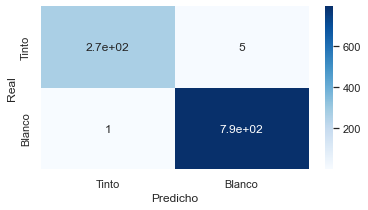

In [101]:
plt.figure(figsize=(6,3))
sns.heatmap(matriz_confusion_df,                   
            annot=True,                     
            cmap="Blues")
pass

En nuestro caso:

- 267 Verdaderos positivos: El valor real es tinto y  la prueba predijo tambien que era tinto. Número de tintos bien clasificados.
- 791 Verdaderos negativos: El valor real  es blanco y la prueba predijo tambien que el resultado era blanco. Número de blancos bien clasificados.
- 1 Falsos positivos: El valor real es blanco, y la prueba predijo  que el resultado es tinto. Número de blancos clasificados como tintos.
- 5 Falsos negativos: El valor real es tinto, y la prueba predijo  que el resultado es blanco. Número de tintos clasificados como blancos.

##### * Curva ROC:

In [102]:
roc = roc_curve(y_true = test_clas["color"],
                y_score = mejor_pipeline.predict(test_clas[features_clas]),
                pos_label=1.0 # Le decimos a roc_curve que los casos positivos son los unos.
               )

roc

(array([0.        , 0.01838235, 1.        ]),
 array([0.        , 0.99873737, 1.        ]),
 array([2, 1, 0]))

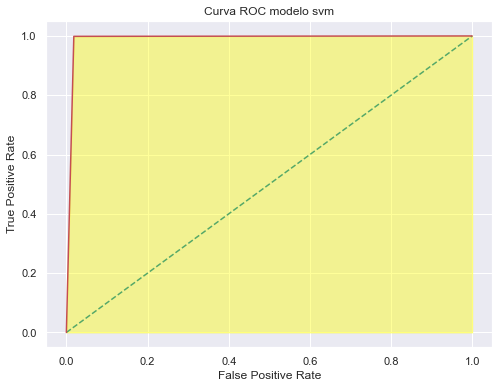

In [103]:
#Cogemos las coordenadas del resultado y dibujamos

coordenadas_fpr = roc[0]
coordenadas_tpr = roc[1]

plt.figure(figsize=(8,6))

# Primero pintamos el random guess:
plt.plot([0,1],[0,1], "g--")

# Y ahora el FPR y TPR de nuestro modelo:
plt.plot(coordenadas_fpr, coordenadas_tpr, "r")

# Coloreamos el área bajo la curva
plt.fill_between(coordenadas_fpr, coordenadas_tpr, alpha=0.4, color="yellow")

plt.title("Curva ROC modelo svm")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
pass

In [104]:
#AUC
auc_svm = roc_auc_score(y_true = test_clas["color"],
                        y_score = mejor_pipeline.predict(test_clas[features_clas])
                       )

print("AUC: " +  str(auc_svm))

AUC: 0.9901775103980986


Nuestro modelo svm es muy bueno: la curva ROC se "despega" muchísimo del random guess por arriba;    
El área bajo la curva ROC es muy cercana al máximo, que es  1 .

###### Guardamos el modelo/pipeline para futuros usos y hacer predicciones:

In [105]:
# Para exportar, usamos pickle.dump:
with open("mejor_pipeline_clasificacion_wine.model", "wb") as archivo_salida:
    pickle.dump(mejor_pipeline, archivo_salida)

In [106]:
# Comprobamos que se guardó bien:
with open("mejor_pipeline_clasificacion_wine.model", "rb") as archivo_entrada:
    pipeline_importada = pickle.load(archivo_entrada)
    
pipeline_importada

Pipeline(steps=[('escalador', StandardScaler()),
                ('svm', SVC(C=0.5, degree=2, gamma='auto', random_state=42))])

In [107]:
#Comprobamos que da el mismo resultado con el dataset de test:
accuracy_en_test_pipeline_cargada = accuracy_en_test = accuracy(y_true = test_clas["color"],
                            y_pred = mejor_pipeline.predict(test_clas[features_clas])
                             )

print("Accuracy de la pipeline tras guardarla y volver a cargarla: %s" % accuracy_en_test_pipeline_cargada)
print("\nAccuracy de la pipeline antes de guardarla: %s" % accuracy_en_test)

Accuracy de la pipeline tras guardarla y volver a cargarla: 0.9943609022556391

Accuracy de la pipeline antes de guardarla: 0.9943609022556391





## 3º .- Hacer un modelo regresor que prediga lo mejor posible la calidad de los vinos.

Revisamos nuestro dataset:

In [109]:
df_wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              5.20              0.34         0.00             1.8      0.050   
1              6.20              0.55         0.45            12.0      0.049   
2              7.15              0.17         0.24             9.6      0.119   
3              6.70              0.64         0.23             2.1      0.080   
4              7.60              0.23         0.34             1.6      0.043   
...             ...               ...          ...             ...        ...   
5315           7.50              0.27         0.31             5.8      0.057   
5316           7.40              0.18         0.30            10.4      0.045   
5317           6.20              0.27         0.49             1.4      0.050   
5318           6.90              0.13         0.28            13.3      0.050   
5319           7.00              0.24         0.36             4.9      0.083   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    27.0                  63.0  0.99160  3.68       0.79   
1                    27.0                 186.0  0.99740  3.17       0.50   
2                    56.0                 178.0  0.99578  3.15       0.44   
3                    11.0                 119.0  0.99538  3.36       0.70   
4                    24.0                 129.0  0.99305  3.12       0.70   
...                   ...                   ...      ...   ...        ...   
5315                131.0                 313.0  0.99460  3.18       0.59   
5316                 44.0                 174.0  0.99660  3.11       0.57   
5317                 20.0                  74.0  0.99310  3.32       0.44   
5318                 47.0                 132.0  0.99655  3.34       0.42   
5319                 10.0                 133.0  0.99420  3.33       0.37   

      alcohol  quality  color  
0        14.0        6      0  
1         9.3        6      1  
2        10.2        6      1  
3        10.9        5      0  
4        10.4        5      1  
...       ...      ...    ...  
5315     10.5        5      1  
5316      9.7        6      1  
5317      9.8        6      1  
5318     10.1        6      1  
5319     10.8        6      1  

[5320 rows x 13 columns]

In [110]:
df_wine.duplicated().sum()

0

In [111]:
df_wine_reg = df_wine.copy(deep=True)

Atendiendo al análisis de los datos, vamos a tener en cuenta el VIF, y eliminar para nuestro estudio, la variable "density".
De momento no vamos a hacer nada con los outliers ni con el resto de variables.

In [112]:
# Voy a pasar la columna quality al final:

df_wine_reg ["quality_bis"] = df_wine_reg["quality"]
del df_wine_reg["quality"]

In [113]:
# Renombramos:

df_wine_reg = df_wine_reg.rename({"quality_bis":"quality"},axis=1)
df_wine_reg.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           5.20              0.34         0.00             1.8      0.050   
1           6.20              0.55         0.45            12.0      0.049   
2           7.15              0.17         0.24             9.6      0.119   
3           6.70              0.64         0.23             2.1      0.080   
4           7.60              0.23         0.34             1.6      0.043   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 27.0                  63.0  0.99160  3.68       0.79   
1                 27.0                 186.0  0.99740  3.17       0.50   
2                 56.0                 178.0  0.99578  3.15       0.44   
3                 11.0                 119.0  0.99538  3.36       0.70   
4                 24.0                 129.0  0.99305  3.12       0.70   

   alcohol  color  quality  
0     14.0      0        6  
1      9.3      1        6  
2     10.2      1        6  
3     10.9      0        5  
4     10.4      1        5

In [114]:
# Listamos el nombre de las columnas y las features:

features_reg = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
            "total sulfur dioxide","density","pH","sulphates","alcohol", "color"]

target_reg = "quality"

X_reg = df_wine_reg[features_reg]
y_reg = df_wine_reg[target_reg]

In [115]:
#dividimos en train y set
df_wine_reg_spliteado = train_test_split(df_wine_reg,
                                         train_size=0.8,
                                         test_size=0.2,
                                         random_state=42,
                                         stratify= df_wine_reg[["quality"]])        

df_wine_reg_train = df_wine_reg_spliteado[0]
df_wine_reg_test = df_wine_reg_spliteado[1]

Como métrica vamos a utilizar en lugar del R2, como medida del rendimiento de nuestra regresión, el MSE y RMSE.

- Definiremos los modelos que instanciaremos:
  - Incluiremos Regularizaciones : Ridge, LASSO y Elastic Net ; con la intención de prevenir el sobreajuste.
  - LinearRegression
  - KNeighborsRegressor
  - DecisionTreeRegressor
  - RandomForestRegressor
  - SVR
  - Gaussian
  - Gradient_boosting 

In [120]:
# Instanciamos los modelos que usaremos:
ridge = Ridge(random_state=42)
elasticnet = ElasticNet(random_state=42)
lasso = linear_model.Lasso(random_state=42)
arbol = DecisionTreeRegressor(random_state=42)
rforest = RandomForestRegressor(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
linreg = LinearRegression()
neighbors = KNeighborsRegressor()
svr = SVR()
svr = LinearSVR()
gaussian = GaussianProcessRegressor(random_state=42)

Para los modelos que  son sensibles a la estandarización, primero definiremos un StandardScaler en sus Pipelines.

In [124]:
# El arbol y el Random Forest sin Pipeline ni selección de variables.

# Vamos a crear dos pipelines: una donde el seleccionador sea RFECV, y otra donde sea un SelectKBest.
# Puesto que ambos seleccionadores son sensibles a la estandarización, un StandardScaler será el primer paso 
# de nuestras Pipelines.


# Linear Regression:

linreg_rfecv = Pipeline(steps=[("escalador",StandardScaler()),
                               ("rfecv",RFECV(estimator=LinearRegression())),
                               ("linreg",LinearRegression())])

linreg_kbest = Pipeline(steps=[("escalador",StandardScaler()),
                               ("kbest",SelectKBest()),
                               ("linreg",LinearRegression())])

# Regression Neighbors:

#Aquí solo vamos a probar sin selección y con KBest

neighbors = Pipeline(steps=[("escalador",StandardScaler()),
                            ("knn",KNeighborsRegressor())])

neighbors_kbest = Pipeline(steps=[("escalador",StandardScaler()),
                                  ("kbest",SelectKBest()),
                                  ("knn",KNeighborsRegressor())])



# SVR:

#Sin selección y con SelectKBest

svr = Pipeline(steps=[("escalador",StandardScaler()),
                      ("svr",SVR())])

svr_kbest = Pipeline(steps=[("escalador",StandardScaler()),
                            ("kbest",SelectKBest()),
                            ("svr",SVR())])


linear_svr = Pipeline(steps=[("scaler",StandardScaler()),
                              ("linear_svr",LinearSVR())])

linear_svr_kbest = Pipeline(steps=[("scaler",StandardScaler()),
                                    ("kbest",SelectKBest()),
                                    ("linear_svr",LinearSVR())])

# Gaussian Process Regressor:

#Con y sin KBest:

gaussian = GaussianProcessRegressor()

gaussian_kbest = Pipeline(steps=[("kbest",SelectKBest()),
                                 ("gaussian",GaussianProcessRegressor())])




In [125]:
grid_ridge = {"alpha":[0.5,1],
              "fit_intercept":[True]}

grid_elasticnet = {"alpha":[0.5,1],
                   "fit_intercept":[True]}

grid_lasso = {"alpha":[0.1,0.5],
              "fit_intercept":[True]}

grid_arbol = {"criterion":["mse"],
              "max_depth":[3,4,5],
              "min_samples_split":[5],
              "min_samples_leaf":[5]}

grid_rforest = {"n_estimators":[5,10,20,30,50,70,100],
                "criterion":["mse"],
                "max_depth":[2,3,5,10,15,30,40],
                "min_samples_split":[2,5,10,15,20],
                "min_samples_leaf":[2,5,10],
                "bootstrap":[True]}

In [126]:
#Vamos a ir pipeline por pipeline, y eligiendo hiperparámetros:

# Pipelines de regresiones lineales:
grid_linreg_rfecv = {"linreg__normalize":[True]}

grid_linreg_kbest = {"kbest__score_func": [f_classif],
                     "kbest__k": [1,2,3],
                     "linreg__normalize":[True]}

# Pipelines de KNN :
grid_neighbors = {"knn__n_neighbors":[3,5,7,10,15,30],
                  "knn__metric":["minkowski","euclidean"]}

grid_neighbors_kbest = {"kbest__score_func": [f_classif],
                        "kbest__k": [1,2,3],
                        "knn__n_neighbors":[3,5,7,9,11],
                        "knn__metric":["minkowski","euclidean"]}

# Pipelines de SVR y Linear SVR:
grid_svr = {"svr__C": [0.1, 1.0],
            "svr__kernel": ["linear","poly"],
            "svr__degree": [2,3],
            "svr__gamma": [0.1,"auto", 1.0]}

grid_svr_kbest = {"kbest__score_func": [f_classif],
                  "kbest__k": [1,2,3],
                  "svr__C": [0.1, 1.0],
                  "svr__kernel": ["linear","poly"],
                  "svr__degree": [2,3],
                  "svr__gamma": [0.1, "auto", 1.0]}

grid_linear_svr = {"linear_svr__C": [0.01, 0.1, 1.0]}

grid_linear_svr_kbest = {"kbest__score_func": [f_classif],
                         "kbest__k": [1,2,3],
                         "linear_svr__C": [0.01, 0.1, 1.0]}

# Pipelines de Gaussian Process:
grid_gaussian = {}

grid_gaussian_kbest = {"kbest__score_func": [f_classif],
                       "kbest__k": [1,2,3]}

In [127]:
# Decimos a cada Grid Search que utilice como métrica de rendimiento a utilizar el error cuadrático medio (MSE):

gs_ridge = GridSearchCV(ridge,
                        grid_ridge,
                        cv=10,
                        scoring="neg_mean_squared_error",
                        verbose=1,
                        n_jobs=-1)

gs_elasticnet = GridSearchCV(elasticnet,
                                grid_elasticnet,
                                cv=10,
                                scoring="neg_mean_squared_error",
                                verbose=1,
                                n_jobs=-1)

gs_lasso = GridSearchCV(lasso,
                            grid_lasso,
                            cv=10,
                            scoring="neg_mean_squared_error",
                            verbose=1,
                            n_jobs=-1)

gs_arbol = GridSearchCV(arbol,
                        grid_arbol,
                        cv=10,
                        scoring="neg_mean_squared_error",
                        verbose=1,
                        n_jobs=-1)

gs_rforest = GridSearchCV(rforest,
                            grid_rforest,
                            cv=10,
                            scoring="neg_mean_squared_error",
                            verbose=2,
                            n_jobs=-1)

gs_linreg_rfecv = GridSearchCV(linreg_rfecv,
                      grid_linreg_rfecv,
                      cv=10,
                      scoring="neg_mean_squared_error",
                      verbose=1,
                      n_jobs=-1)

gs_linreg_kbest = GridSearchCV(linreg_kbest,
                            grid_linreg_kbest,
                            cv=10,
                            scoring="neg_mean_squared_error",
                            verbose=1,
                            n_jobs=-1)

gs_neighbors = GridSearchCV(neighbors,
                     grid_neighbors,
                     cv=10,
                     scoring="neg_mean_squared_error",
                     verbose=1,
                     n_jobs=-1)
               
gs_neighbors_kbest = GridSearchCV(neighbors_kbest,
                           grid_neighbors_kbest,
                           cv=10,
                           scoring="neg_mean_squared_error",
                           verbose=1,
                           n_jobs=-1)

gs_svr = GridSearchCV(svr,
                      grid_svr,
                      cv=10,
                      scoring="neg_mean_squared_error",
                      verbose=1,
                      n_jobs=-1)

gs_svr_kbest = GridSearchCV(svr_kbest,
                      grid_svr_kbest,
                      cv=10,
                      scoring="neg_mean_squared_error",
                      verbose=2,
                      n_jobs=-1)

gs_linear_svr = GridSearchCV(linear_svr,
                      grid_linear_svr,
                      cv=10,
                      scoring="neg_mean_squared_error",
                      verbose=2,
                      n_jobs=-1)

gs_linear_svr_kbest = GridSearchCV(linear_svr_kbest,
                      grid_linear_svr_kbest,
                      cv=10,
                      scoring="neg_mean_squared_error",
                      verbose=2,
                      n_jobs=-1)

gs_gaussian = GridSearchCV(gaussian,
                      grid_gaussian,
                      cv=10,
                      scoring="neg_mean_squared_error",
                      verbose=1,
                      n_jobs=-1)

gs_gaussian_kbest = GridSearchCV(gaussian_kbest,
                      grid_gaussian_kbest,
                      cv=10,
                      scoring="neg_mean_squared_error",
                      verbose=1,
                      n_jobs=-1)

 Metemos todos los GridSearchCV en un diccionario para identificarlo más rápido:

In [128]:
todos_los_GridSearchs = {"gs_ridge":gs_ridge,
                          "gs_elasticnet":gs_elasticnet,
                          "gs_lasso":gs_lasso,
                          "gs_arbol":gs_arbol,
                          "gs_rforest":gs_rforest,
                          "gs_linreg_rfecv":gs_linreg_rfecv,
                          "gs_linreg_kbest":gs_linreg_kbest,
                          "gs_neighbors":gs_neighbors,
                          "gs_neighbors_kbest":gs_neighbors_kbest,
                          "gs_svr":gs_svr,
                          "gs_svr_kbest":gs_svr_kbest,
                          "gs_linear_svr":gs_linear_svr,
                          "gs_linear_svr_kbest":gs_linear_svr_kbest,
                          "gs_gaussian":gs_gaussian,
                          "gs_gaussian_kbest":gs_gaussian_kbest
                         }

In [129]:
for nombre, grid_search in todos_los_GridSearchs.items():
    print("Haciendo Grid Search de %s..." % nombre)
    grid_search.fit(df_wine_reg_train[features_reg], df_wine_reg_train["quality"])

Haciendo Grid Search de gs_ridge...
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Haciendo Grid Search de gs_elasticnet...
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Haciendo Grid Search de gs_lasso...
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Haciendo Grid Search de gs_arbol...
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Haciendo Grid Search de gs_rforest...
Fitting 10 folds for each of 735 candidates, totalling 7350 fits
Haciendo Grid Search de gs_linreg_rfecv...
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Haciendo Grid Search de gs_linreg_kbest...
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Haciendo Grid Search de gs_neighbors...
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Haciendo Grid Search de gs_neighbors_kbest...
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Haciendo Grid Search de gs_svr...
Fitting 10 folds for each of 24 candidates, totall

Veamos cúal ha sido el mejor resultado en cross validation de cada GridSearch:

In [130]:
mejor_puntuación_GridSearch = [(modelo, grid_search.best_score_)
                                for modelo, grid_search in todos_los_GridSearchs.items()]  

mejor_puntuación_GridSearch_df = pd.DataFrame(mejor_puntuación_GridSearch,
                                                 columns=["GridSearchCV", "Mejor score"])

mejor_puntuación_GridSearch_df_ordenado = (mejor_puntuación_GridSearch_df
                                              .sort_values(by="Mejor score", ascending=False)
                                             )

mejor_puntuación_GridSearch_df_ordenado

GridSearchCV  Mejor score
4            gs_rforest    -0.472415
7          gs_neighbors    -0.509649
5       gs_linreg_rfecv    -0.532847
9                gs_svr    -0.533279
11        gs_linear_svr    -0.533426
0              gs_ridge    -0.534813
6       gs_linreg_kbest    -0.552104
12  gs_linear_svr_kbest    -0.552767
10         gs_svr_kbest    -0.553621
3              gs_arbol    -0.557629
8    gs_neighbors_kbest    -0.577958
2              gs_lasso    -0.592037
1         gs_elasticnet    -0.646964
14    gs_gaussian_kbest    -1.015769
13          gs_gaussian   -21.256272

Sería el Random Forest con un score de 0.4724

In [131]:
mejor_GridSearch = todos_los_GridSearchs["gs_rforest"]

Y dentro de este GridSearchCV, el mejor modelo (pipeline) ha resultado ser:

In [132]:
mejor_pipeline = mejor_GridSearch.best_estimator_
mejor_GridSearch.best_estimator_

RandomForestRegressor(criterion='mse', max_depth=30, min_samples_leaf=2,
                      min_samples_split=5, random_state=42)

Vamos a re-entrenar el modelo:

In [134]:
mejor_pipeline.fit(df_wine_reg_train[features_reg], df_wine_reg_train["quality"])

RandomForestRegressor(criterion='mse', max_depth=30, min_samples_leaf=2,
                      min_samples_split=5, random_state=42)

Veamos el MSE y RMSE de nuestro modelo con el set de test:

In [135]:
mse_test = mse (y_true = df_wine_reg_test["quality"],
               y_pred = mejor_pipeline.predict(df_wine_reg_test[features_reg]))

print("El modelo tiene un 'mse':%s y un 'rmse':%s en el conjunto de test" % (mse_test,np.sqrt(mse_test)))

El modelo tiene un 'mse':0.4954771688637043 y un 'rmse':0.7039013914346982 en el conjunto de test


- El modelo tiene un MSE en train del 0.4724 y en test del 0.4954. Mide el error cuadrado promedio de nuestras predicciones.
- El modelo tiene un RMSE en test del 0.7039. Es una buena medida de la precisión con que el modelo predice la respuesta.

El RMSE nos dice hasta qué punto, en promedio, se equivocaron nuestras predicciones. 
Un RMSE de 0 significaría que estábamos haciendo predicciones perfectas. 0,7 significa que estamos, en promedio, a unas 0,7 de la respuesta correcta. 

* Comparamos valores en train y test:

In [168]:
print('MAE:',mae (df_wine_reg_test["quality"], mejor_pipeline.predict(df_wine_reg_test[features_reg])))
print('MSE:', mse (df_wine_reg_test["quality"], mejor_pipeline.predict(df_wine_reg_test[features_reg])))
print('R2:', r2_score(df_wine_reg_test["quality"], mejor_pipeline.predict(df_wine_reg_test[features_reg])))

MAE: 0.5417721631438737
MSE: 0.4954771688637043
R2: 0.36032583001641694


Los hiperparámetros elegidos minimizan el MSE en validación cruzada para este modelo.             
             
             

En nuestro caso, al tener outliers, mejor utilizar el "mae", puesto que el "mse" es más sensible a su presencia.

A pesar de que nuestro modelo presenta un intermedio mae y mse en train y test, aún está alejado del valor deseado próximoa cero. A su vez, el R2 está bastante alejado del valores próximos a 1 (aunque ya comentamos que el R2 era muy sensible al número de variables)

#### Vamos a hacer una selección de variables, a ver qué resultados arrojan los distintos modelos.

#### * Para empezar, vamos a intentar encontrar un mejor modelo fijándonos en el VIF, que nos indicaba que había multicolinealidad.
Prescindiremos de la columna densidad y veremos qué ocurre:

In [169]:
df_wine_reg

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              5.20              0.34         0.00             1.8      0.050   
1              6.20              0.55         0.45            12.0      0.049   
2              7.15              0.17         0.24             9.6      0.119   
3              6.70              0.64         0.23             2.1      0.080   
4              7.60              0.23         0.34             1.6      0.043   
...             ...               ...          ...             ...        ...   
5315           7.50              0.27         0.31             5.8      0.057   
5316           7.40              0.18         0.30            10.4      0.045   
5317           6.20              0.27         0.49             1.4      0.050   
5318           6.90              0.13         0.28            13.3      0.050   
5319           7.00              0.24         0.36             4.9      0.083   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    27.0                  63.0  0.99160  3.68       0.79   
1                    27.0                 186.0  0.99740  3.17       0.50   
2                    56.0                 178.0  0.99578  3.15       0.44   
3                    11.0                 119.0  0.99538  3.36       0.70   
4                    24.0                 129.0  0.99305  3.12       0.70   
...                   ...                   ...      ...   ...        ...   
5315                131.0                 313.0  0.99460  3.18       0.59   
5316                 44.0                 174.0  0.99660  3.11       0.57   
5317                 20.0                  74.0  0.99310  3.32       0.44   
5318                 47.0                 132.0  0.99655  3.34       0.42   
5319                 10.0                 133.0  0.99420  3.33       0.37   

      alcohol  color  quality  
0        14.0      0        6  
1         9.3      1        6  
2        10.2      1        6  
3        10.9      0        5  
4        10.4      1        5  
...       ...    ...      ...  
5315     10.5      1        5  
5316      9.7      1        6  
5317      9.8      1        6  
5318     10.1      1        6  
5319     10.8      1        6  

[5320 rows x 13 columns]

In [173]:
df_wine_opciónII = df_wine_reg.copy(deep=True)

In [174]:
df_wine_opciónII = df_wine_opciónII.drop(["density"], axis=1)

In [175]:
df_wine_opciónII

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              5.20              0.34         0.00             1.8      0.050   
1              6.20              0.55         0.45            12.0      0.049   
2              7.15              0.17         0.24             9.6      0.119   
3              6.70              0.64         0.23             2.1      0.080   
4              7.60              0.23         0.34             1.6      0.043   
...             ...               ...          ...             ...        ...   
5315           7.50              0.27         0.31             5.8      0.057   
5316           7.40              0.18         0.30            10.4      0.045   
5317           6.20              0.27         0.49             1.4      0.050   
5318           6.90              0.13         0.28            13.3      0.050   
5319           7.00              0.24         0.36             4.9      0.083   

      free sulfur dioxide  total sulfur dioxide    pH  sulphates  alcohol  \
0                    27.0                  63.0  3.68       0.79     14.0   
1                    27.0                 186.0  3.17       0.50      9.3   
2                    56.0                 178.0  3.15       0.44     10.2   
3                    11.0                 119.0  3.36       0.70     10.9   
4                    24.0                 129.0  3.12       0.70     10.4   
...                   ...                   ...   ...        ...      ...   
5315                131.0                 313.0  3.18       0.59     10.5   
5316                 44.0                 174.0  3.11       0.57      9.7   
5317                 20.0                  74.0  3.32       0.44      9.8   
5318                 47.0                 132.0  3.34       0.42     10.1   
5319                 10.0                 133.0  3.33       0.37     10.8   

      color  quality  
0         0        6  
1         1        6  
2         1        6  
3         0        5  
4         1        5  
...     ...      ...  
5315      1        5  
5316      1        6  
5317      1        6  
5318      1        6  
5319      1        6  

[5320 rows x 12 columns]

In [177]:
# Listamos el nombre de las columnas y las features:

features_reg_opciónII = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
            "total sulfur dioxide","pH","sulphates","alcohol", "color"]

target_reg_opciónII = "quality"

X_reg_opciónII = df_wine_opciónII[features_reg_opciónII]
y_reg_opciónII = df_wine_opciónII[target_reg_opciónII]

In [178]:
#dividimos en train y set
df_wine_reg_spliteado_opciónII = train_test_split(df_wine_opciónII,
                                         train_size=0.8,
                                         test_size=0.2,
                                         random_state=42,
                                         stratify= df_wine_opciónII[["quality"]])        

df_wine_reg_train_opciónII = df_wine_reg_spliteado_opciónII[0]
df_wine_reg_test_opciónII = df_wine_reg_spliteado_opciónII[1]

In [179]:
todos_los_GridSearchs_opciónII = {"gs_ridge":gs_ridge,
                          "gs_elasticnet":gs_elasticnet,
                          "gs_lasso":gs_lasso,
                          "gs_arbol":gs_arbol,
                          "gs_rforest":gs_rforest,
                          "gs_linreg_rfecv":gs_linreg_rfecv,
                          "gs_linreg_kbest":gs_linreg_kbest,
                          "gs_neighbors":gs_neighbors,
                          "gs_neighbors_kbest":gs_neighbors_kbest,
                          "gs_svr":gs_svr,
                          "gs_svr_kbest":gs_svr_kbest,
                          "gs_linear_svr":gs_linear_svr,
                          "gs_linear_svr_kbest":gs_linear_svr_kbest,
                          "gs_gaussian":gs_gaussian,
                          "gs_gaussian_kbest":gs_gaussian_kbest
                         }

In [180]:
for nombre, grid_search in todos_los_GridSearchs_opciónII.items():
    print("Haciendo Grid Search de %s..." % nombre)
    grid_search.fit(df_wine_reg_train_opciónII[features_reg_opciónII], df_wine_reg_train_opciónII["quality"])

Haciendo Grid Search de gs_ridge...
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Haciendo Grid Search de gs_elasticnet...
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Haciendo Grid Search de gs_lasso...
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Haciendo Grid Search de gs_arbol...
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Haciendo Grid Search de gs_rforest...
Fitting 10 folds for each of 735 candidates, totalling 7350 fits
Haciendo Grid Search de gs_linreg_rfecv...
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Haciendo Grid Search de gs_linreg_kbest...
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Haciendo Grid Search de gs_neighbors...
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Haciendo Grid Search de gs_neighbors_kbest...
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Haciendo Grid Search de gs_svr...
Fitting 10 folds for each of 24 candidates, totall

In [191]:
mejor_puntuación_GridSearch_opciónII = [(modelo, grid_search.best_score_)
                                for modelo, grid_search in todos_los_GridSearchs_opciónII.items()]  

mejor_puntuación_GridSearch_opciónII_df = pd.DataFrame(mejor_puntuación_GridSearch_opciónII,
                                                 columns=["GridSearchCV", "Mejor score"])

mejor_puntuación_GridSearch_opciónII_df_ordenado = (mejor_puntuación_GridSearch_opciónII_df
                                                    .sort_values(by="Mejor score", ascending=False)
                                                     )

mejor_puntuación_GridSearch_opciónII_df_ordenado

GridSearchCV  Mejor score
4            gs_rforest    -0.472451
7          gs_neighbors    -0.508608
0              gs_ridge    -0.534832
11        gs_linear_svr    -0.534964
9                gs_svr    -0.535344
5       gs_linreg_rfecv    -0.535864
3              gs_arbol    -0.555137
6       gs_linreg_kbest    -0.556047
10         gs_svr_kbest    -0.557615
12  gs_linear_svr_kbest    -0.558232
8    gs_neighbors_kbest    -0.579810
2              gs_lasso    -0.592037
1         gs_elasticnet    -0.646964
14    gs_gaussian_kbest    -1.015769
13          gs_gaussian   -21.256264

Vuelve a ser el Random Forest, con un score de 0.4724.

Exactamente igual.

In [192]:
mejor_GridSearch_opciónII = todos_los_GridSearchs_opciónII["gs_rforest"]

Y dentro de este GridSearchCV, el mejor modelo (pipeline) ha resultado ser:

In [193]:
mejor_pipeline_opciónII = mejor_GridSearch_opciónII.best_estimator_
mejor_GridSearch_opciónII.best_estimator_

RandomForestRegressor(criterion='mse', max_depth=15, min_samples_leaf=2,
                      min_samples_split=5, random_state=42)

En la primera opción seleccionaba el max_depth=30, resto igual.

Vamos a re-entrenar el modelo:

In [194]:
mejor_pipeline_opciónII.fit(df_wine_reg_train_opciónII[features_reg_opciónII], df_wine_reg_train_opciónII["quality"])

RandomForestRegressor(criterion='mse', max_depth=15, min_samples_leaf=2,
                      min_samples_split=5, random_state=42)

In [228]:
mse_test_opciónII = mse (y_true = df_wine_reg_test_opciónII["quality"],
               y_pred = mejor_pipeline_opciónII.predict(df_wine_reg_test_opciónII[features_reg_opciónII]))

print("El modelo tiene un 'mse':%s y un 'rmse':%s en el conjunto de test" % (mse_test_opciónII,np.sqrt(mse_test_opciónII)))

El modelo tiene un 'mse':0.4935411341776247 y un 'rmse':0.7025248281574287 en el conjunto de test


In [229]:
print('MAE:',mae (df_wine_reg_test_opciónII["quality"], 
                  mejor_pipeline_opciónII.predict(df_wine_reg_test_opciónII[features_reg_opciónII])))
print('MSE:', mse (df_wine_reg_test_opciónII["quality"], 
                  mejor_pipeline_opciónII.predict(df_wine_reg_test_opciónII[features_reg_opciónII])))
print('R2:', r2_score(df_wine_reg_test_opciónII["quality"], 
                  mejor_pipeline_opciónII.predict(df_wine_reg_test_opciónII[features_reg_opciónII])))

MAE: 0.5424853568905694
MSE: 0.4935411341776247
R2: 0.3628253021590335


#### * Vamos a ver qué pasaría si hacemos selección de variables usando árboles de decisión, utilizando SelectFromModel:

In [197]:
# Creamos un arbol, que como el problema es de regresión...
arbol = DecisionTreeRegressor(criterion="mse", # Para que la métrica de criterio sea MSE
                                 max_depth=6,
                                 min_samples_split=5,
                                 min_samples_leaf=5,
                                 random_state=42
                                )

# Y se lo pasamos a una instancia de SelectFromModel:
sfm = SelectFromModel(estimator=arbol)

# Y usamos .fit_transform() para seleccionar:
wine_selectedFromModel = sfm.fit_transform(X=df_wine_reg_train[features_reg],
                                             y=df_wine_reg_train["quality"])

# Lo pasamos a DataFrame y añadimos columna de target:
wine_selectedFromModel = recuperar_columnas(df_wine_reg_train, wine_selectedFromModel)

# Y re-añadimos la columna de target:
wine_selectedFromModel["quality"] = df_wine_reg_train["quality"]

wine_selectedFromModel[:5]

volatile acidity  alcohol  quality
621               0.21      9.4        5
3098              0.23     11.2        6
3439              0.30     12.0        6
2943              0.34     12.3        6
3534              0.23     11.1        6

Parece que el árbol ha decidido quedarse únicamente con 2 variables:

In [199]:
df_wine_opciónIII = df_wine_reg.copy(deep=True)

In [200]:
df_wine_opciónIII = df_wine_opciónIII.drop(["fixed acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
            "total sulfur dioxide","density","pH","sulphates", "color"], axis=1)

In [201]:
df_wine_opciónIII

volatile acidity  alcohol  quality
0                 0.34     14.0        6
1                 0.55      9.3        6
2                 0.17     10.2        6
3                 0.64     10.9        5
4                 0.23     10.4        5
...                ...      ...      ...
5315              0.27     10.5        5
5316              0.18      9.7        6
5317              0.27      9.8        6
5318              0.13     10.1        6
5319              0.24     10.8        6

[5320 rows x 3 columns]

In [202]:
# Listamos el nombre de las columnas y las features:

features_reg_opciónIII = ["volatile acidity", "alcohol"]

target_reg_opciónIII = "quality"

X_reg_opciónIII = df_wine_opciónIII[features_reg_opciónIII]
y_reg_opciónIII = df_wine_opciónIII[target_reg_opciónIII]

In [208]:
#dividimos en train y set
df_wine_reg_spliteado_opciónIII = train_test_split(df_wine_opciónIII,
                                         train_size=0.8,
                                         test_size=0.2,
                                         random_state=42,
                                         stratify= df_wine_reg[["quality"]])        

df_wine_reg_train_opciónIII = df_wine_reg_spliteado_opciónIII[0]
df_wine_reg_test_opciónIII = df_wine_reg_spliteado_opciónIII[1]

Para este caso seleccionaremos un número menor de modelos para entrenar:

In [205]:
# Instanciamos los modelos que usaremos:

elasticnet = ElasticNet(random_state=42)
arbol = DecisionTreeRegressor(random_state=42)
rforest = RandomForestRegressor(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
neighbors = KNeighborsRegressor()
svr = SVR()
gaussian = GaussianProcessRegressor(random_state=42)

In [206]:
# El arbol y el Random Forest sin Pipeline ni selección de variables.

# Vamos a crear dos pipelines: una donde el seleccionador sea RFECV, y otra donde sea un SelectKBest.
# Puesto que ambos seleccionadores son sensibles a la estandarización, un StandardScaler será el primer paso 
# de nuestras Pipelines.


# Regression Neighbors:

#Aquí solo vamos a probar sin selección y con KBest

neighbors = Pipeline(steps=[("escalador",StandardScaler()),
                            ("knn",KNeighborsRegressor())])



# SVR:

#Sin selección y con SelectKBest

svr = Pipeline(steps=[("escalador",StandardScaler()),
                      ("svr",SVR())])


linear_svr = Pipeline(steps=[("scaler",StandardScaler()),
                              ("linear_svr",LinearSVR())])


# Gaussian Process Regressor:

#Con y sin KBest:

gaussian = GaussianProcessRegressor()




In [207]:

grid_elasticnet = {"alpha":[0.5,1],
                   "fit_intercept":[True]}


grid_arbol = {"criterion":["mse"],
              "max_depth":[3,4,5],
              "min_samples_split":[5],
              "min_samples_leaf":[5]}

grid_rforest = {"n_estimators":[5,10,20,30,50,70,100],
                "criterion":["mse"],
                "max_depth":[2,3,5,10,15,30,40],
                "min_samples_split":[2,5,10,15,20],
                "min_samples_leaf":[2,5,10],
                "bootstrap":[True]}

In [210]:
#Vamos a ir pipeline por pipeline, y eligiendo hiperparámetros:


# Pipelines de KNN :
grid_neighbors = {"knn__n_neighbors":[3,5,7,10,15,30],
                  "knn__metric":["minkowski","euclidean"]}


# Pipelines de SVR y Linear SVR:
grid_svr = {"svr__C": [0.1, 1.0],
            "svr__kernel": ["linear","poly"],
            "svr__degree": [2,3],
            "svr__gamma": [0.1,"auto", 1.0]}



grid_linear_svr = {"linear_svr__C": [0.01, 0.1, 1.0]}



# Pipelines de Gaussian Process:
grid_gaussian = {}


In [211]:
# Decimos a cada Grid Search que utilice como métrica de rendimiento a utilizar el error cuadrático medio (MSE):


gs_elasticnet = GridSearchCV(elasticnet,
                                grid_elasticnet,
                                cv=10,
                                scoring="neg_mean_squared_error",
                                verbose=1,
                                n_jobs=-1)


gs_arbol = GridSearchCV(arbol,
                        grid_arbol,
                        cv=10,
                        scoring="neg_mean_squared_error",
                        verbose=1,
                        n_jobs=-1)

gs_rforest = GridSearchCV(rforest,
                            grid_rforest,
                            cv=10,
                            scoring="neg_mean_squared_error",
                            verbose=2,
                            n_jobs=-1)



gs_neighbors = GridSearchCV(neighbors,
                     grid_neighbors,
                     cv=10,
                     scoring="neg_mean_squared_error",
                     verbose=1,
                     n_jobs=-1)
               


gs_svr = GridSearchCV(svr,
                      grid_svr,
                      cv=10,
                      scoring="neg_mean_squared_error",
                      verbose=1,
                      n_jobs=-1)



gs_linear_svr = GridSearchCV(linear_svr,
                      grid_linear_svr,
                      cv=10,
                      scoring="neg_mean_squared_error",
                      verbose=2,
                      n_jobs=-1)


gs_gaussian = GridSearchCV(gaussian,
                      grid_gaussian,
                      cv=10,
                      scoring="neg_mean_squared_error",
                      verbose=1,
                      n_jobs=-1)


In [212]:
todos_los_GridSearchs_opciónIII = {"gs_elasticnet":gs_elasticnet,
                          "gs_arbol":gs_arbol,
                          "gs_rforest":gs_rforest,
                          "gs_neighbors":gs_neighbors,
                          "gs_svr":gs_svr, 
                          "gs_linear_svr":gs_linear_svr,
                          "gs_gaussian":gs_gaussian,
                                  }

In [213]:
for nombre, grid_search in todos_los_GridSearchs_opciónIII.items():
    print("Haciendo Grid Search de %s..." % nombre)
    grid_search.fit(df_wine_reg_train_opciónIII[features_reg_opciónIII], df_wine_reg_train_opciónIII["quality"])

Haciendo Grid Search de gs_elasticnet...
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Haciendo Grid Search de gs_arbol...
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Haciendo Grid Search de gs_rforest...
Fitting 10 folds for each of 735 candidates, totalling 7350 fits
Haciendo Grid Search de gs_neighbors...
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Haciendo Grid Search de gs_svr...
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Haciendo Grid Search de gs_linear_svr...
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Haciendo Grid Search de gs_gaussian...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [214]:
mejor_puntuación_GridSearch_opciónIII = [(modelo, grid_search.best_score_)
                                for modelo, grid_search in todos_los_GridSearchs_opciónIII.items()]  

mejor_puntuación_GridSearch_opciónIII_df = pd.DataFrame(mejor_puntuación_GridSearch_opciónIII,
                                                 columns=["GridSearchCV", "Mejor score"])

mejor_puntuación_GridSearch_opciónIII_df_ordenado = (mejor_puntuación_GridSearch_opciónIII_df
                                                    .sort_values(by="Mejor score", ascending=False)
                                                     )

mejor_puntuación_GridSearch_opciónIII_df_ordenado

GridSearchCV  Mejor score
2     gs_rforest    -0.552447
4         gs_svr    -0.557645
5  gs_linear_svr    -0.558495
3   gs_neighbors    -0.559046
1       gs_arbol    -0.568000
0  gs_elasticnet    -0.658306
6    gs_gaussian   -37.015262

También sería el Random Forest, pero empeora, con un score de 0.5524.


   

In [215]:
mejor_GridSearch_opciónIII = todos_los_GridSearchs_opciónIII["gs_rforest"]

In [223]:
mejor_pipeline_opciónIII = mejor_GridSearch_opciónIII.best_estimator_
mejor_GridSearch_opciónIII.best_estimator_

RandomForestRegressor(criterion='mse', max_depth=5, min_samples_leaf=2,
                      min_samples_split=20, random_state=42)

In [226]:
mejor_pipeline_opciónIII.fit(df_wine_reg_train_opciónIII[features_reg_opciónIII], df_wine_reg_train_opciónIII["quality"])

RandomForestRegressor(criterion='mse', max_depth=5, min_samples_leaf=2,
                      min_samples_split=20, random_state=42)

In [231]:
mse_test_opciónIII = mse (y_true = df_wine_reg_test_opciónIII["quality"],
               y_pred = mejor_pipeline_opciónIII.predict(df_wine_reg_test_opciónIII[features_reg_opciónIII]))

print("El modelo tiene un 'mse':%s y un 'rmse':%s en el conjunto de test" % (mse_test_opciónIII,np.sqrt(mse_test_opciónIII)))

El modelo tiene un 'mse':0.5763358392735245 y un 'rmse':0.7591678597474504 en el conjunto de test


In [234]:
print('MAE:',mae (df_wine_reg_test_opciónIII["quality"], 
                  mejor_pipeline_opciónIII.predict(df_wine_reg_test_opciónIII[features_reg_opciónIII])))
print('MSE:', mse (df_wine_reg_test_opciónIII["quality"], 
                  mejor_pipeline_opciónIII.predict(df_wine_reg_test_opciónIII[features_reg_opciónIII])))
print('R2:', r2_score(df_wine_reg_test_opciónIII["quality"], 
                  mejor_pipeline_opciónIII.predict(df_wine_reg_test_opciónIII[features_reg_opciónIII])))

MAE: 0.5915073258622148
MSE: 0.5763358392735245
R2: 0.25593514134150464


#### * Seguimos buscando un modelo cuyo score y métricas sean más precisas:
Para ello, vamos a descartar variables atendiendo a las correlaciones:

In [242]:
df_wine_opciónIV = df_wine_reg.copy(deep=True)

In [243]:
df_wine_opciónIV = df_wine_opciónIV.drop(["fixed acidity", "residual sugar", "free sulfur dioxide"], axis=1)

In [244]:
df_wine_opciónIV

volatile acidity  citric acid  chlorides  total sulfur dioxide  density  \
0                 0.34         0.00      0.050                  63.0  0.99160   
1                 0.55         0.45      0.049                 186.0  0.99740   
2                 0.17         0.24      0.119                 178.0  0.99578   
3                 0.64         0.23      0.080                 119.0  0.99538   
4                 0.23         0.34      0.043                 129.0  0.99305   
...                ...          ...        ...                   ...      ...   
5315              0.27         0.31      0.057                 313.0  0.99460   
5316              0.18         0.30      0.045                 174.0  0.99660   
5317              0.27         0.49      0.050                  74.0  0.99310   
5318              0.13         0.28      0.050                 132.0  0.99655   
5319              0.24         0.36      0.083                 133.0  0.99420   

        pH  sulphates  alcohol  color  quality  
0     3.68       0.79     14.0      0        6  
1     3.17       0.50      9.3      1        6  
2     3.15       0.44     10.2      1        6  
3     3.36       0.70     10.9      0        5  
4     3.12       0.70     10.4      1        5  
...    ...        ...      ...    ...      ...  
5315  3.18       0.59     10.5      1        5  
5316  3.11       0.57      9.7      1        6  
5317  3.32       0.44      9.8      1        6  
5318  3.34       0.42     10.1      1        6  
5319  3.33       0.37     10.8      1        6  

[5320 rows x 10 columns]

In [245]:
# Listamos el nombre de las columnas y las features:

features_reg_opciónIV = ["volatile acidity", "citric acid","chlorides", "total sulfur dioxide","density",
                         "pH","sulphates","alcohol","color"]

target_reg_opciónIV = "quality"

X_reg_opciónIV = df_wine_opciónIV[features_reg_opciónIV]
y_reg_opciónIV = df_wine_opciónIV[target_reg_opciónIV]

In [246]:
#dividimos en train y set
df_wine_reg_spliteado_opciónIV = train_test_split(df_wine_opciónIV,
                                         train_size=0.8,
                                         test_size=0.2,
                                         random_state=42,
                                         stratify= df_wine_reg[["quality"]])        

df_wine_reg_train_opciónIV = df_wine_reg_spliteado_opciónIV[0]
df_wine_reg_test_opciónIV = df_wine_reg_spliteado_opciónIV[1]

In [247]:
# Instanciamos los modelos que usaremos:

elasticnet = ElasticNet(random_state=42)
arbol = DecisionTreeRegressor(random_state=42)
rforest = RandomForestRegressor(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
neighbors = KNeighborsRegressor()
svr = SVR()
gaussian = GaussianProcessRegressor(random_state=42)

In [248]:
# El arbol y el Random Forest sin Pipeline ni selección de variables.

# Vamos a crear dos pipelines: una donde el seleccionador sea RFECV, y otra donde sea un SelectKBest.
# Puesto que ambos seleccionadores son sensibles a la estandarización, un StandardScaler será el primer paso 
# de nuestras Pipelines.


# Regression Neighbors:

#Aquí solo vamos a probar sin selección y con KBest

neighbors = Pipeline(steps=[("escalador",StandardScaler()),
                            ("knn",KNeighborsRegressor())])



# SVR:

#Sin selección y con SelectKBest

svr = Pipeline(steps=[("escalador",StandardScaler()),
                      ("svr",SVR())])


linear_svr = Pipeline(steps=[("scaler",StandardScaler()),
                              ("linear_svr",LinearSVR())])


# Gaussian Process Regressor:

#Con y sin KBest:

gaussian = GaussianProcessRegressor()

In [249]:

grid_elasticnet = {"alpha":[0.5,1],
                   "fit_intercept":[True]}


grid_arbol = {"criterion":["mse"],
              "max_depth":[3,4,5],
              "min_samples_split":[5],
              "min_samples_leaf":[5]}

grid_rforest = {"n_estimators":[5,10,20,30,50,70,100],
                "criterion":["mse"],
                "max_depth":[2,3,5,10,15,30,40],
                "min_samples_split":[2,5,10,15,20],
                "min_samples_leaf":[2,5,10],
                "bootstrap":[True]}

In [250]:
#Vamos a ir pipeline por pipeline, y eligiendo hiperparámetros:


# Pipelines de KNN :
grid_neighbors = {"knn__n_neighbors":[3,5,7,10,15,30],
                  "knn__metric":["minkowski","euclidean"]}


# Pipelines de SVR y Linear SVR:
grid_svr = {"svr__C": [0.1, 1.0],
            "svr__kernel": ["linear","poly"],
            "svr__degree": [2,3],
            "svr__gamma": [0.1,"auto", 1.0]}



grid_linear_svr = {"linear_svr__C": [0.01, 0.1, 1.0]}



# Pipelines de Gaussian Process:
grid_gaussian = {}


In [251]:
# Decimos a cada Grid Search que utilice como métrica de rendimiento a utilizar el error cuadrático medio (MSE):


gs_elasticnet = GridSearchCV(elasticnet,
                                grid_elasticnet,
                                cv=10,
                                scoring="neg_mean_squared_error",
                                verbose=1,
                                n_jobs=-1)


gs_arbol = GridSearchCV(arbol,
                        grid_arbol,
                        cv=10,
                        scoring="neg_mean_squared_error",
                        verbose=1,
                        n_jobs=-1)

gs_rforest = GridSearchCV(rforest,
                            grid_rforest,
                            cv=10,
                            scoring="neg_mean_squared_error",
                            verbose=2,
                            n_jobs=-1)



gs_neighbors = GridSearchCV(neighbors,
                     grid_neighbors,
                     cv=10,
                     scoring="neg_mean_squared_error",
                     verbose=1,
                     n_jobs=-1)
               


gs_svr = GridSearchCV(svr,
                      grid_svr,
                      cv=10,
                      scoring="neg_mean_squared_error",
                      verbose=1,
                      n_jobs=-1)



gs_linear_svr = GridSearchCV(linear_svr,
                      grid_linear_svr,
                      cv=10,
                      scoring="neg_mean_squared_error",
                      verbose=2,
                      n_jobs=-1)


gs_gaussian = GridSearchCV(gaussian,
                      grid_gaussian,
                      cv=10,
                      scoring="neg_mean_squared_error",
                      verbose=1,
                      n_jobs=-1)


In [252]:
todos_los_GridSearchs_opciónIV = {"gs_elasticnet":gs_elasticnet,
                          "gs_arbol":gs_arbol,
                          "gs_rforest":gs_rforest,
                          "gs_neighbors":gs_neighbors,
                          "gs_svr":gs_svr, 
                          "gs_linear_svr":gs_linear_svr,
                          "gs_gaussian":gs_gaussian,
                                  }

In [253]:
for nombre, grid_search in todos_los_GridSearchs_opciónIV.items():
    print("Haciendo Grid Search de %s..." % nombre)
    grid_search.fit(df_wine_reg_train_opciónIV[features_reg_opciónIV], df_wine_reg_train_opciónIV["quality"])

Haciendo Grid Search de gs_elasticnet...
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Haciendo Grid Search de gs_arbol...
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Haciendo Grid Search de gs_rforest...
Fitting 10 folds for each of 735 candidates, totalling 7350 fits
Haciendo Grid Search de gs_neighbors...
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Haciendo Grid Search de gs_svr...
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Haciendo Grid Search de gs_linear_svr...
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Haciendo Grid Search de gs_gaussian...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [254]:
mejor_puntuación_GridSearch_opciónIV = [(modelo, grid_search.best_score_)
                                for modelo, grid_search in todos_los_GridSearchs_opciónIV.items()]  

mejor_puntuación_GridSearch_opciónIV_df = pd.DataFrame(mejor_puntuación_GridSearch_opciónIV,
                                                 columns=["GridSearchCV", "Mejor score"])

mejor_puntuación_GridSearch_opciónIV_df_ordenado = (mejor_puntuación_GridSearch_opciónIV_df
                                                    .sort_values(by="Mejor score", ascending=False)
                                                     )

mejor_puntuación_GridSearch_opciónIV_df_ordenado

GridSearchCV  Mejor score
2     gs_rforest    -0.499574
3   gs_neighbors    -0.518886
4         gs_svr    -0.545603
5  gs_linear_svr    -0.546580
1       gs_arbol    -0.558805
0  gs_elasticnet    -0.658341
6    gs_gaussian    -5.301580

También sería el Random Forest,  con un score de 0.4995, similar al de la primera opción


   

In [255]:
mejor_GridSearch_opciónIV = todos_los_GridSearchs_opciónIV["gs_rforest"]

In [256]:
mejor_pipeline_opciónIV = mejor_GridSearch_opciónIV.best_estimator_
mejor_GridSearch_opciónIV.best_estimator_

RandomForestRegressor(criterion='mse', max_depth=30, min_samples_leaf=2,
                      random_state=42)

In [257]:
mejor_pipeline_opciónIV.fit(df_wine_reg_train_opciónIV[features_reg_opciónIV], df_wine_reg_train_opciónIV["quality"])

RandomForestRegressor(criterion='mse', max_depth=30, min_samples_leaf=2,
                      random_state=42)

In [258]:
mse_test_opciónIV = mse (y_true = df_wine_reg_test_opciónIV["quality"],
               y_pred = mejor_pipeline_opciónIV.predict(df_wine_reg_test_opciónIV[features_reg_opciónIV]))

print("El modelo tiene un 'mse':%s y un 'rmse':%s en el conjunto de test" % (mse_test_opciónIV,np.sqrt(mse_test_opciónIV)))

El modelo tiene un 'mse':0.5253882686246125 y un 'rmse':0.7248367185957211 en el conjunto de test


In [259]:
print('MAE:',mae (df_wine_reg_test_opciónIV["quality"], 
                  mejor_pipeline_opciónIV.predict(df_wine_reg_test_opciónIV[features_reg_opciónIV])))
print('MSE:', mse (df_wine_reg_test_opciónIV["quality"], 
                  mejor_pipeline_opciónIV.predict(df_wine_reg_test_opciónIV[features_reg_opciónIV])))
print('R2:', r2_score(df_wine_reg_test_opciónIV["quality"], 
                  mejor_pipeline_opciónIV.predict(df_wine_reg_test_opciónIV[features_reg_opciónIV])))

MAE: 0.5556542387489287
MSE: 0.5253882686246125
R2: 0.3217098066853432


Una vez observadas todas las opciones para regresión, vemos que la primera opción, en la que se tienen en cuenta todas las variables y la segunda, en la que descartamos la variable densidad, por el VIF, dan scores prácticamente idénticos con el Random Forest, al igual que con el resto de métricas, con lo que podríamos elegir cualquiera de los dos para guardar como modelo seleccionado.

Nos quedamos con la primera opción, y visualizamos qué tal predice:

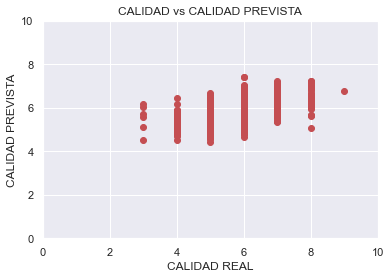

In [274]:
plt.scatter(df_wine_reg_test["quality"],mejor_pipeline.predict(df_wine_reg_test[features_reg]),c="r")
plt.xlabel("CALIDAD REAL")
plt.ylabel("CALIDAD PREVISTA")
plt.title("CALIDAD vs CALIDAD PREVISTA")
plt.xlim(0, 10)
plt.ylim(0, 10);

Conclusiones: Vemos que nuestro modelo predice relativamente bien, pero con algo de margen. Esto es debido a que los datos de nuestro dataset se concentran entre los valores de calidad 5, 6 y 7, prediciendo alrededor de esos valores casi siempre.

No considero el eliminar outliers puesto que si lo hacemos el modelo no valdría para predecir vinos de categorías bajas (3) ni altas (9). 

###### Guardamos el modelo/pipeline para futuros usos y hacer predicciones:

In [265]:

with open("mejor_pipeline_regresion_wine.model", "wb") as archivo_salida:
    pickle.dump(mejor_pipeline, archivo_salida)

In [266]:
#Comprobamos que se guardó bien:

with open("mejor_pipeline_regresion_wine.model", "rb") as archivo_entrada:
    pipeline_importada = pickle.load(archivo_entrada)
    
pipeline_importada

RandomForestRegressor(criterion='mse', max_depth=30, min_samples_leaf=2,
                      min_samples_split=5, random_state=42)

In [269]:
#Comprobamos que da el mismo resultado con el dataset de test:
mse_test_pipeline_cargada = mse (y_true = df_wine_reg_test["quality"],
               y_pred = mejor_pipeline.predict(df_wine_reg_test[features_reg]))


print("mse  de la pipeline tras guardarla y volver a cargarla: %s" % mse_test_pipeline_cargada)
print("mse  de la pipeline antes de guardarla: %s" % mse_test)

mse  de la pipeline tras guardarla y volver a cargarla: 0.4954771688637043
mse  de la pipeline antes de guardarla: 0.4954771688637043
